<a href="https://colab.research.google.com/github/riyautekar25/AI_mini_project/blob/main/DS_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

In [ ]:
def scrapping(keyword):
  url = f'https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords={keyword}'
  html_text = requests.get(url).text
  soup = BeautifulSoup(html_text, 'lxml')
  jobs = soup.find_all('li', class_ = 'clearfix job-bx wht-shd-bx')

  company_name_l = []
  skills_l=[]
  published_date_l=[]
  more_info_l = []
  experience_l = []
  location_l = []
  for job in jobs:
    company_name = job.find('h3', class_ = 'joblist-comp-name').text.replace(' ','')
    skills = job.find('span', class_ = 'srp-skills').text.replace(' ','')
    published_date = job.find('span', class_ = 'sim-posted').text
    experience = job.find('ul',class_ = 'top-jd-dtl clearfix').text
    years_match = re.search(r'(\d+)\s+yrs', experience)
    years = int(years_match.group(1)) if years_match else None
    location_match = re.search(r'location_on\s+(.*)', experience)
    location = location_match.group(1).strip() if location_match else None
    company_name_l.append(company_name)
    skills_l.append(skills)
    more_info = job.header.h2.a['href']
    numbers = re.findall(r'\d+', published_date)
    numbers = [int(num) for num in numbers]
    published_date_l.append(numbers)
    more_info_l.append(more_info)
    experience_l.append(years)
    location_l.append(location)
  company_name_l = [name.strip() for name in company_name_l]
  skills_l = [skill.strip()for skill in skills_l]
  return company_name_l, skills_l, published_date_l, more_info_l, experience_l, location_l
keywords = ['python', 'php', 'java', 'django', 'rest', 'sql', 'git', 'database','nosql','html','bootstrap','ajax','web developer','Data Analyst', 'Data Science','Data Management', 'Data Architect']
df_list=[]
for keyword in keywords:
  company_name_l, skills_l, published_date_l, more_info_l, experience_l, location_l = scrapping(keyword)
  data = {'Company': company_name_l, 'Skills': skills_l, 'PublishedDate': published_date_l, 'Link':more_info_l, 'Experience':experience_l, 'Location':location_l}
  df = pd.DataFrame(data)
  df_list.append(df)
final_df = pd.concat(df_list, ignore_index=True)

In [ ]:
final_df

,Company,Skills,PublishedDate,Link,Experience,Location
0,LAKSHHUMANRESOURCE,"rest,python,django,git",[1],https://www.timesjobs.com/job-detail/python-de...,3,Mumbai
1,SEVENCONSULTANCY,"rest,python,storage",[1],https://www.timesjobs.com/job-detail/python-de...,3,"Navi Mumbai, Mumbai, Thane"
2,SEVENCONSULTANCY,"python,mvc,sql",[3],https://www.timesjobs.com/job-detail/python-de...,7,"Navi Mumbai, Mumbai"
3,LAKSHHUMANRESOURCE,"rest,python,django,git",[4],https://www.timesjobs.com/job-detail/python-de...,3,Mumbai
4,DREAMAJAXTECHNOLOGIES,"python,django,api,sql,nosql",[1],https://www.timesjobs.com/job-detail/python-de...,7,Bengaluru / Bangalore
...,...,...,...,...,...,...
420,SEVENCONSULTANCY,"security,devops,hadoop,api,bigdata,projectdeli...",[3],https://www.timesjobs.com/job-detail/senior-da...,3,"Delhi, Delhi/NCR"
421,SEVENCONSULTANCY,"scala,softwaredesign,datawarehousing,elasticse...",[3],https://www.timesjobs.com/job-detail/big-data-...,15,Hyderabad/Secunderabad
422,AnalyticsVidhya,"python,softwaredesign,scala,machinelearning,el...",[1],https://www.timesjobs.com/job-detail/big-data-...,15,Mumbai
423,AnalyticsVidhya,"hive,scala,pig,security,devops,hadoop,bigdata,...",[1],https://www.timesjobs.com/job-detail/big-data-...,10,Chennai


In [ ]:
final_df.shape

(425, 6)

In [92]:
skill_count = {}
for skills_str in final_df['Skills']:
    skills_list = [skill.strip() for skill in skills_str.split(',')]
    for skill in skills_list:
        skill_count[skill] = skill_count.get(skill, 0) + 1
print(skill_count)

{'rest': 26, 'python': 69, 'django': 40, 'git': 43, 'storage': 12, 'mvc': 13, 'sql': 68, 'api': 27, 'nosql': 41, 'database': 82, 'css': 85, 'html': 83, 'bootstrap': 44, 'mysql': 58, 'html5': 50, 'javascript': 115, 'webdeveloper': 32, 'ajax': 35, 'postgresql': 9, 'docker': 6, 'github': 4, 'softwaredeveloper': 4, 'springboot': 7, 'java': 58, 'jpa': 2, 'hibernate': 13, 'Pythonprogramming': 1, 'programminglanguage': 1, 'front-enddeveloper': 1, 'problemsolving': 16, 'softwareproject': 1, 'softwareengineering': 2, 'security': 45, 'testingtools': 1, 'debugging': 15, 'oops': 22, 'linux': 12, 'oop': 1, 'teamplayer': 7, 'mongodb': 20, 'cakephp': 1, 'phpdeveloper': 25, 'xml': 22, 'cake': 3, 'codeigniter': 10, 'php': 58, 'zend': 3, 'wordpress': 23, 'mobile': 29, 'webprogramming': 4, 'jquery': 55, 'phpprogrammer': 4, 'laravel': 5, 'webdevelopment': 11, 'Java': 8, 'Architect': 1, 'Lead': 1, 'Designer': 1, 'TeamManagement': 1, 'objectorientedanalysis': 1, 'mentor': 1, 'technicalleadership': 1, 'appli

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

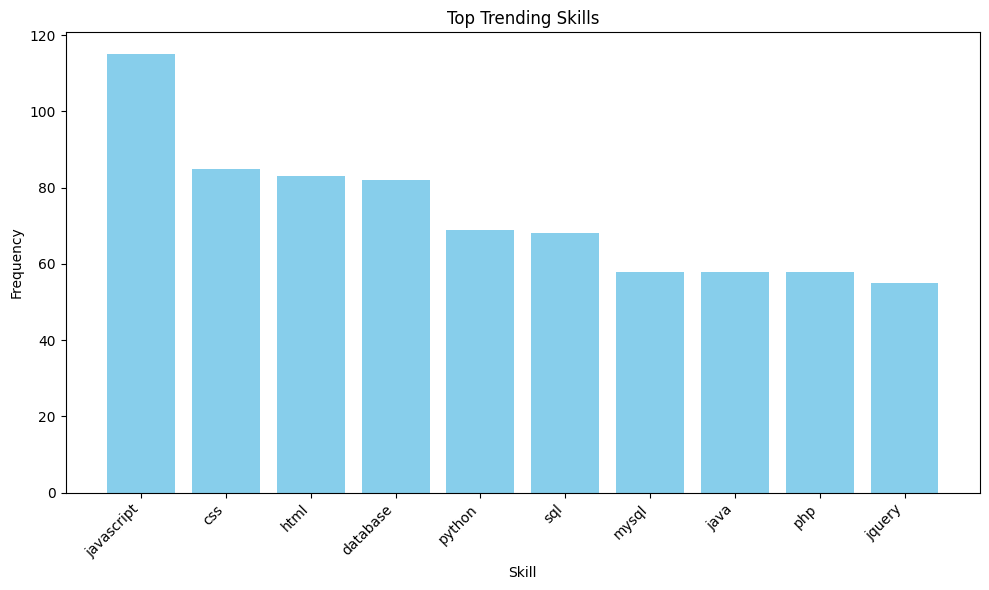

In [94]:
sorted_skills = sorted(skill_count.items(), key=lambda x: x[1], reverse=True)
top_skills = dict(sorted_skills[:10])

# Plot the top N most common skills
plt.figure(figsize=(10, 6))
plt.bar(top_skills.keys(), top_skills.values(), color='skyblue')
plt.title('Top Trending Skills')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

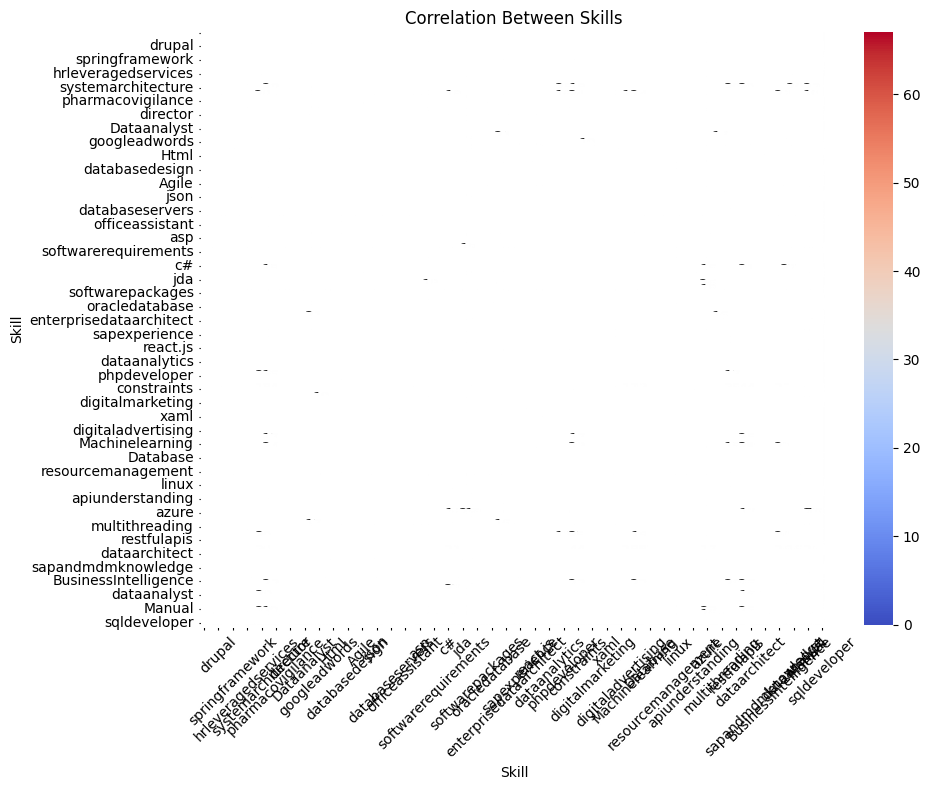

In [89]:
all_skills = set()
for skills_str in final_df['Skills']:
    skills_list = [skill.strip() for skill in skills_str.split(',')]
    all_skills.update(skills_list)

# Convert set to list
all_skills_list = list(all_skills)

# Create a DataFrame to store skill occurrences
skill_occurrences = pd.DataFrame(0, index=all_skills_list, columns=all_skills_list)

# Iterate over each row in the DataFrame
for skills_str in final_df['Skills']:
    skills_list = [skill.strip() for skill in skills_str.split(',')]
    # Update the skill occurrences DataFrame
    for i, skill1 in enumerate(skills_list):
        for j, skill2 in enumerate(skills_list):
            if i != j:
                skill_occurrences.at[skill1, skill2] += 1

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(skill_occurrences, cmap='coolwarm', annot=True, fmt='d')
plt.title('Correlation Between Skills')
plt.xlabel('Skill')
plt.ylabel('Skill')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
skill_occurrences

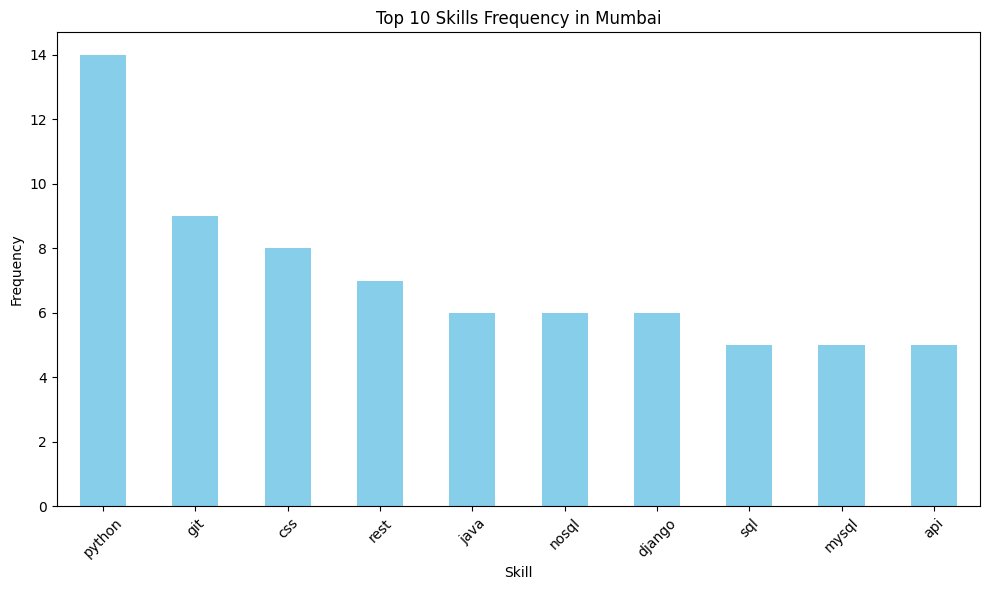

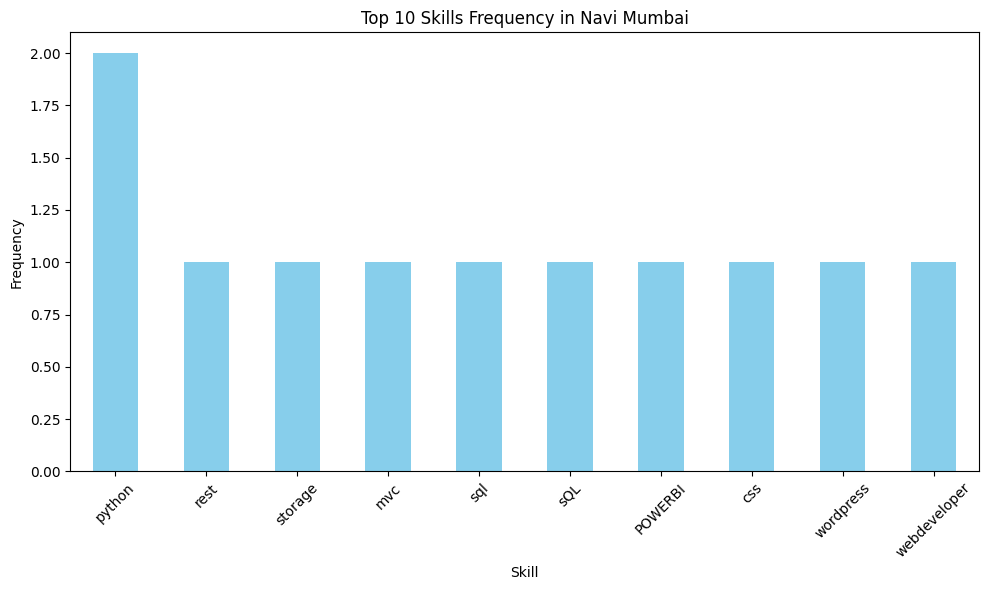

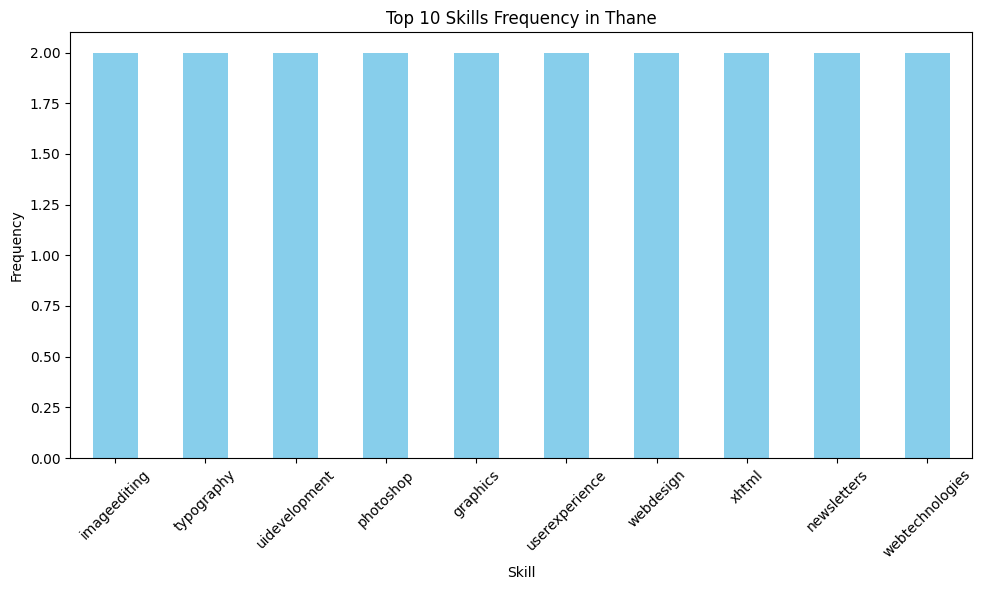

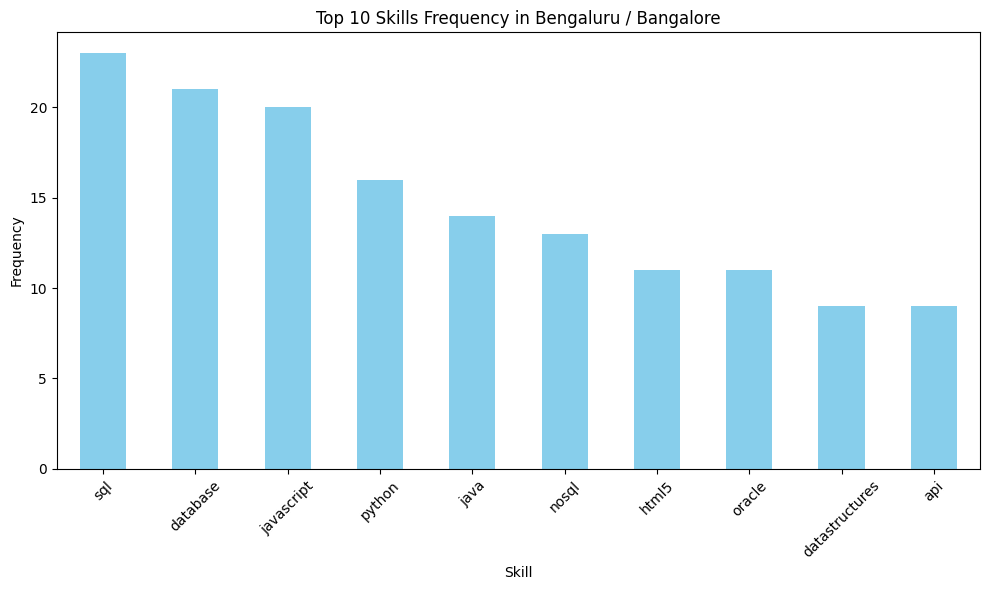

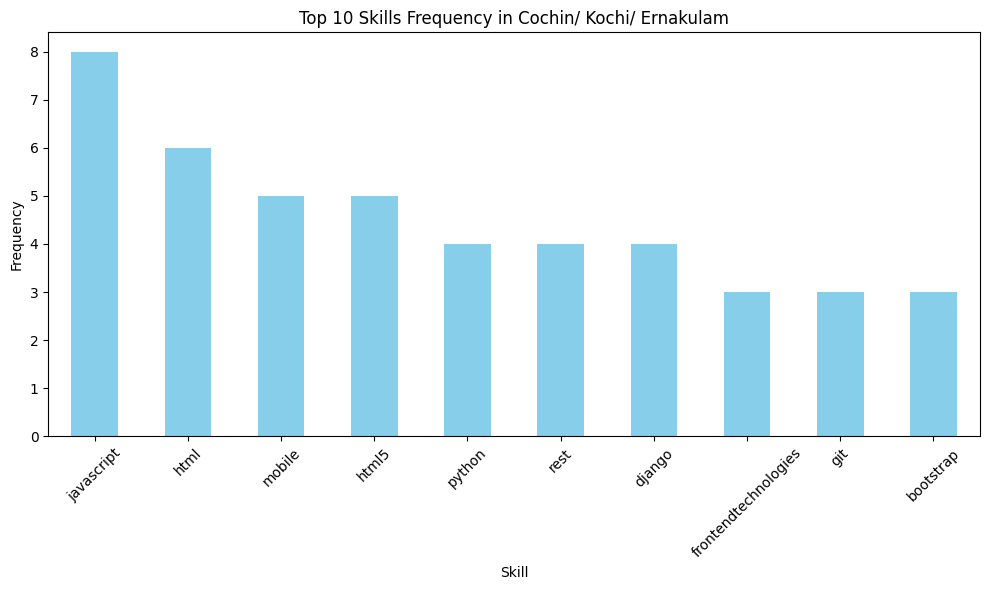

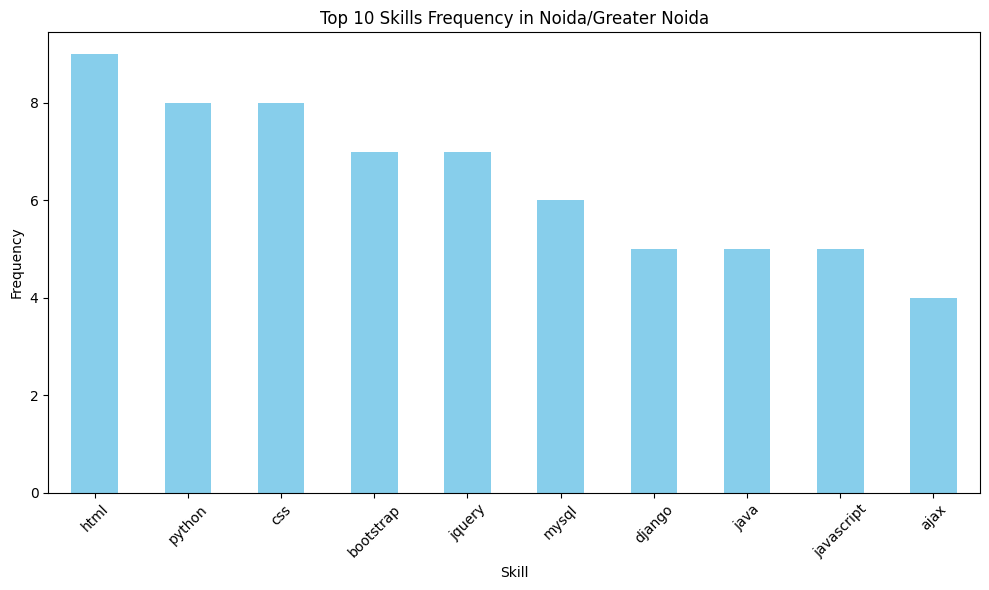

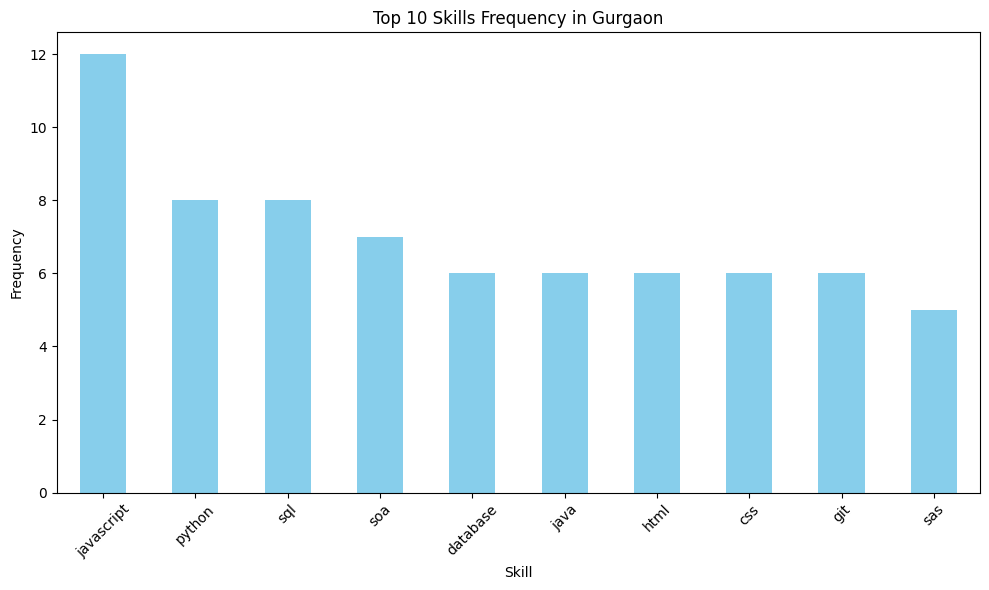

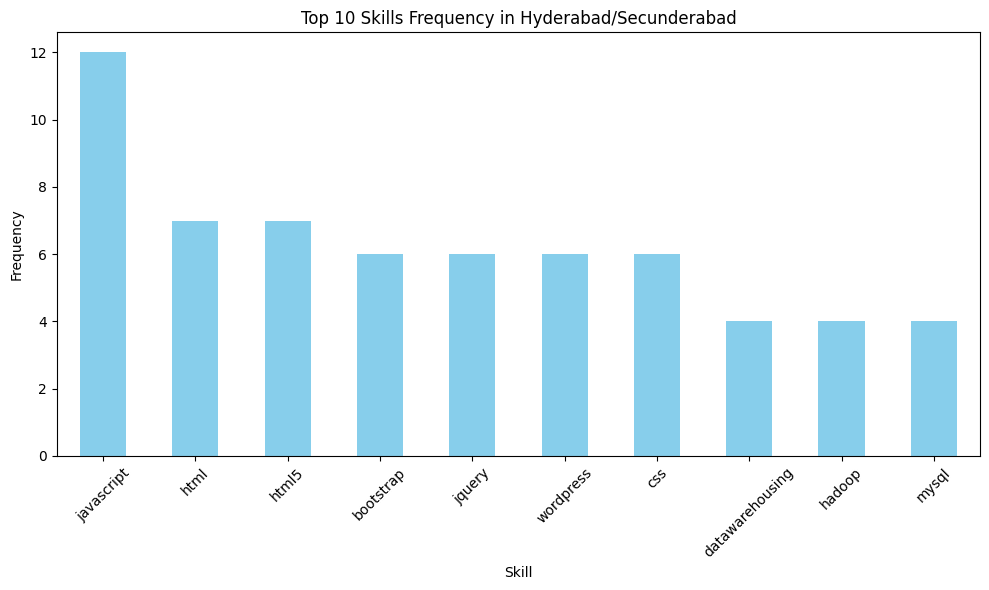

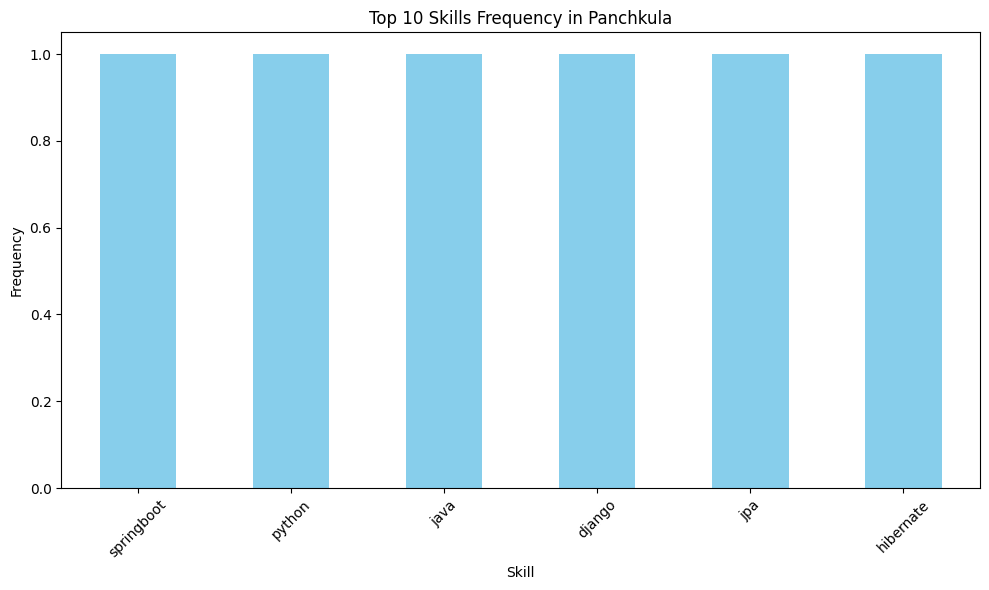

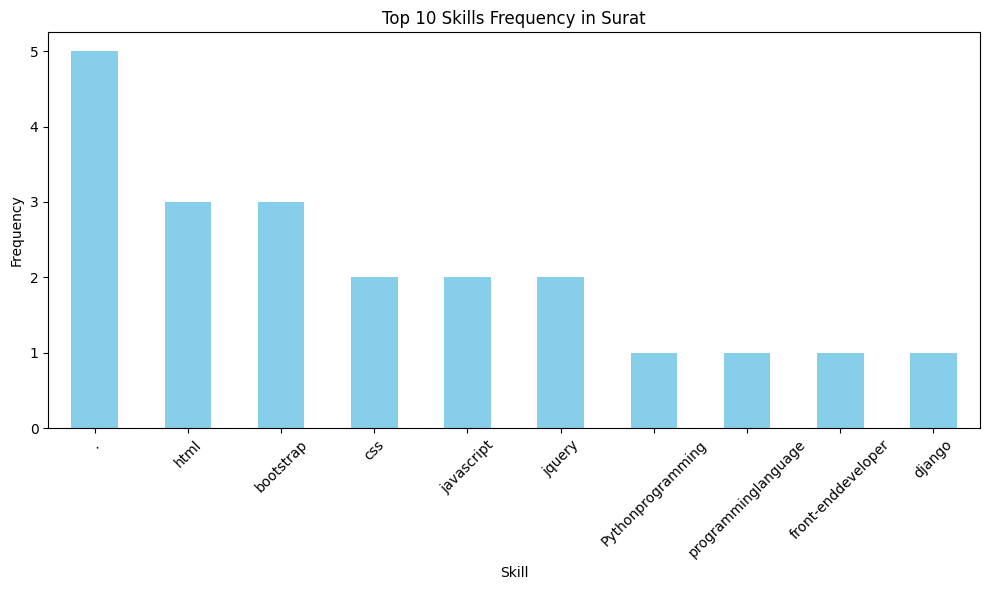

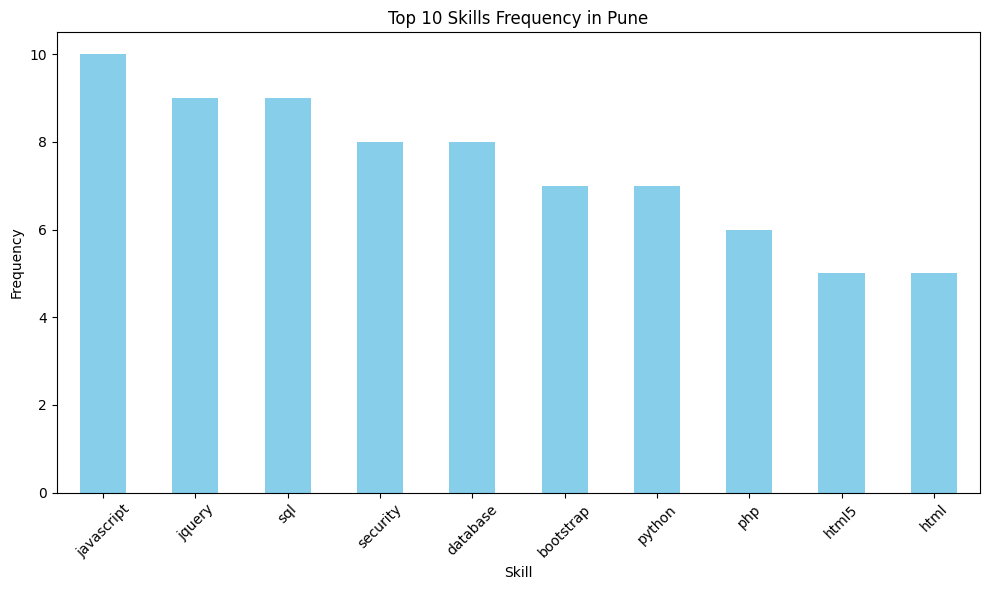

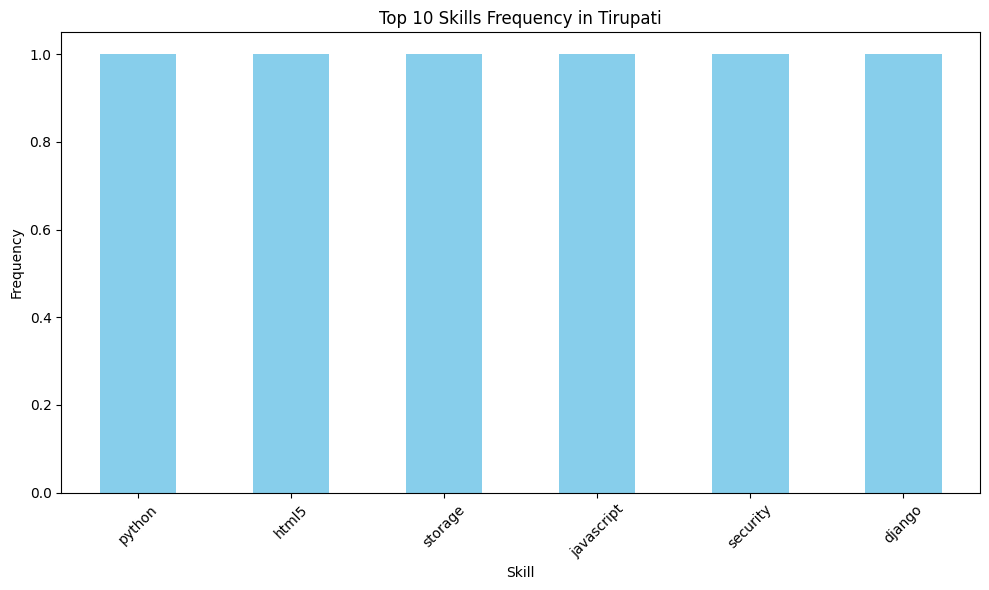

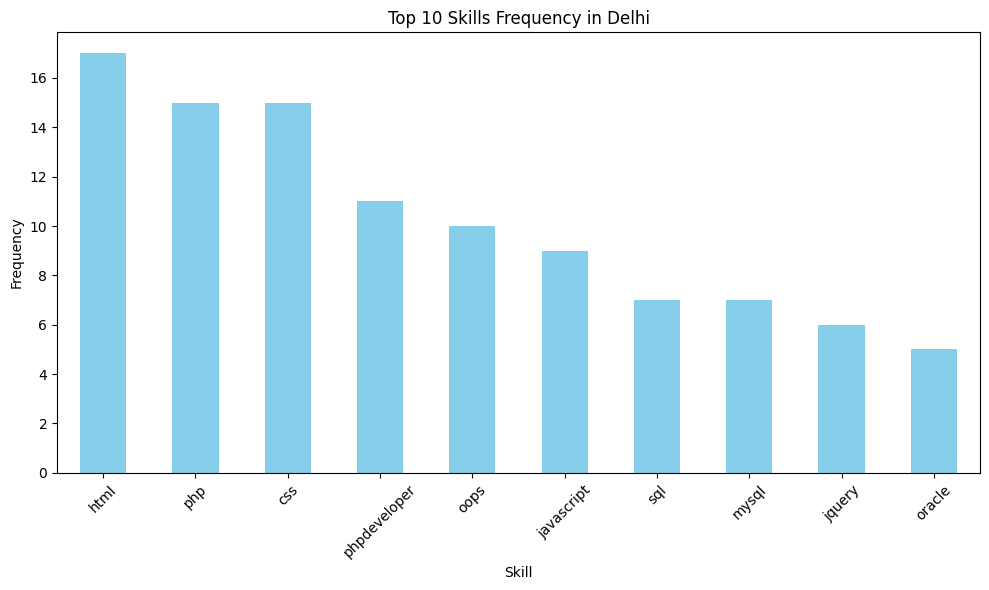

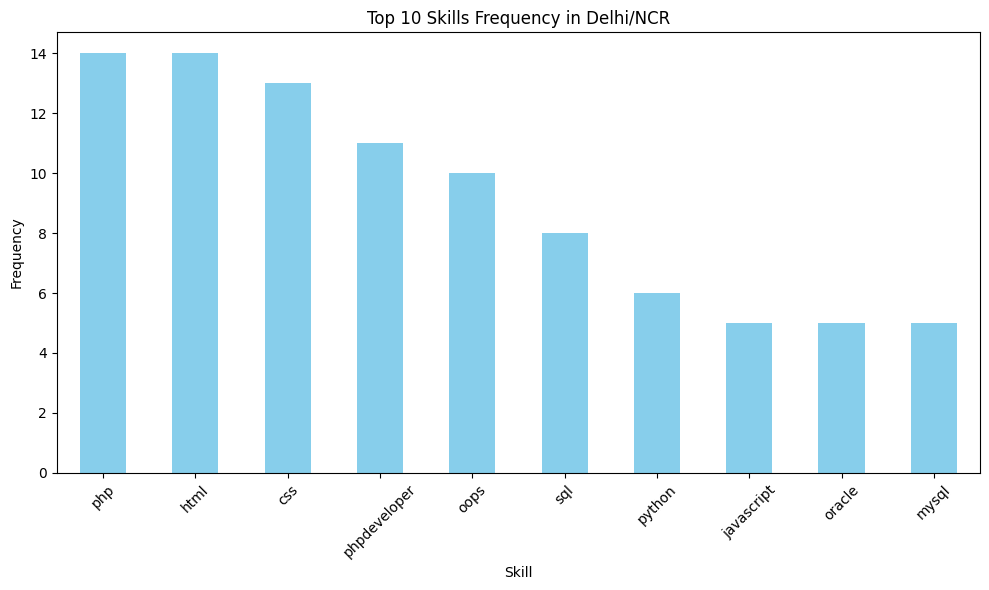

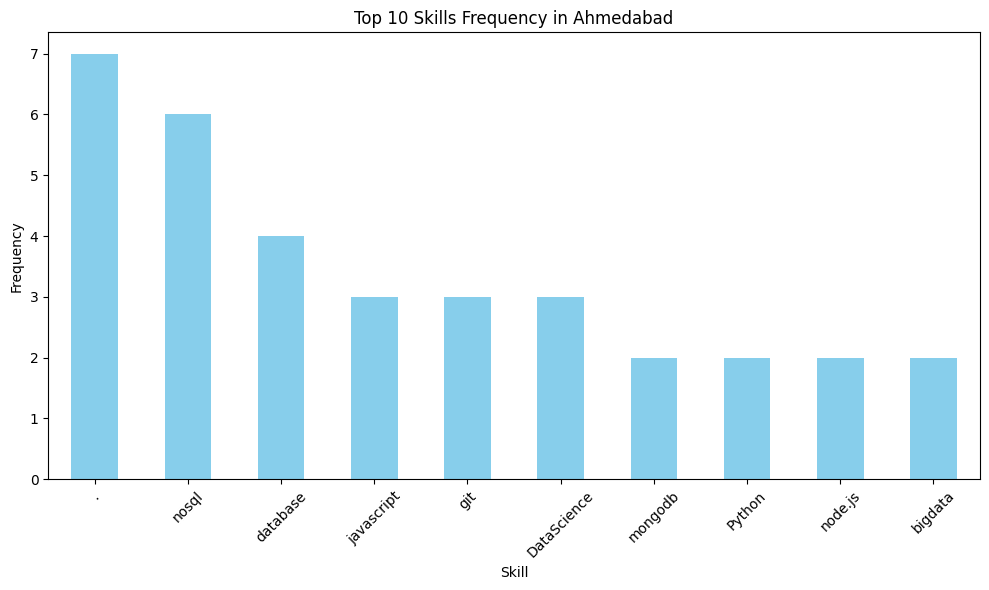

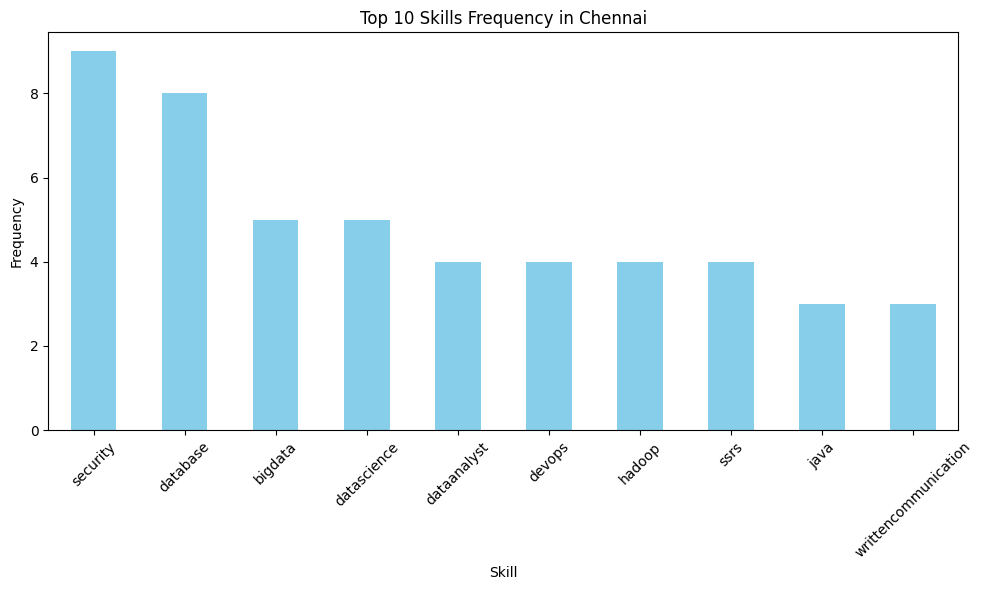

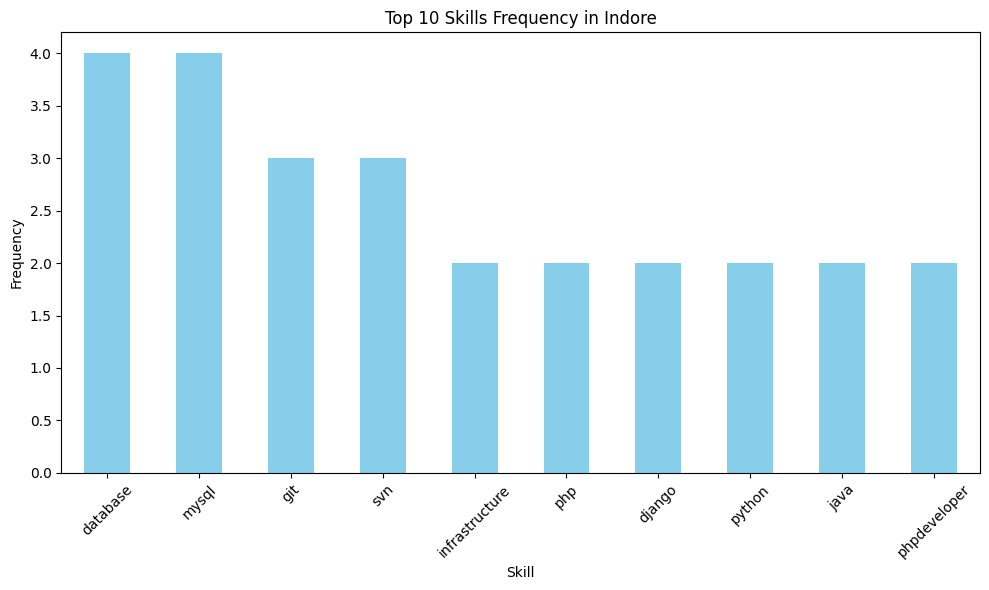

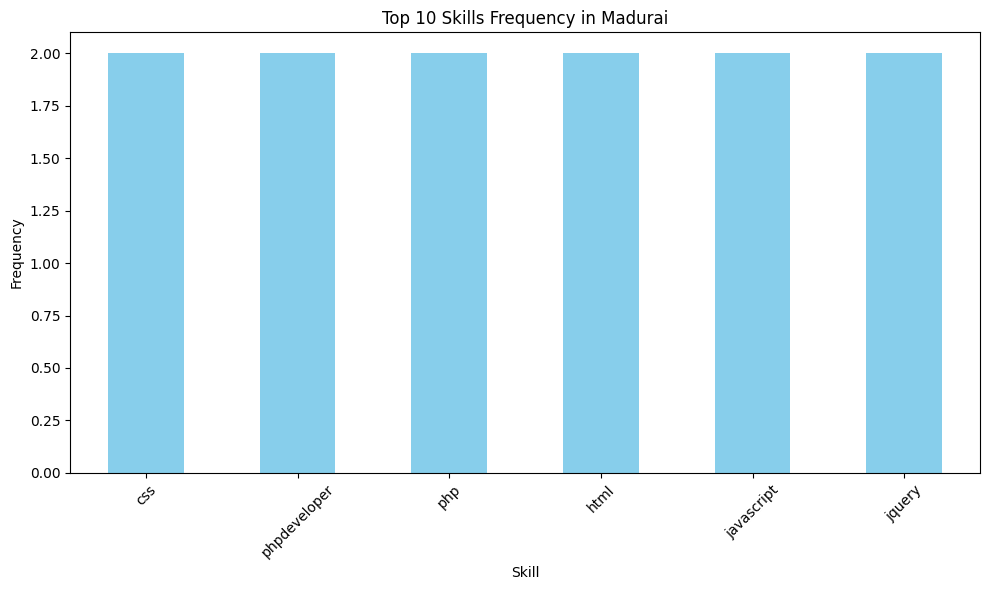

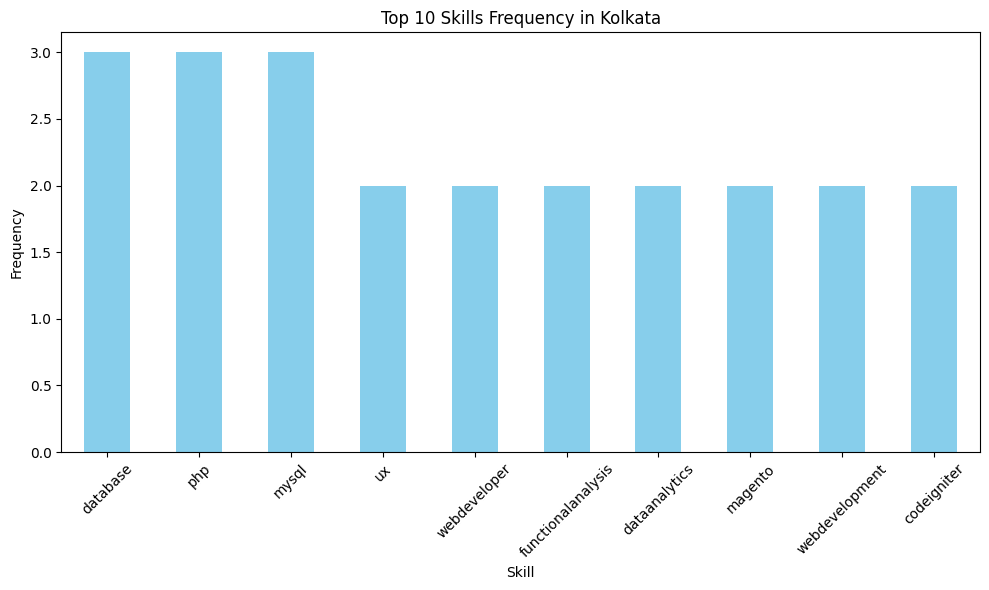

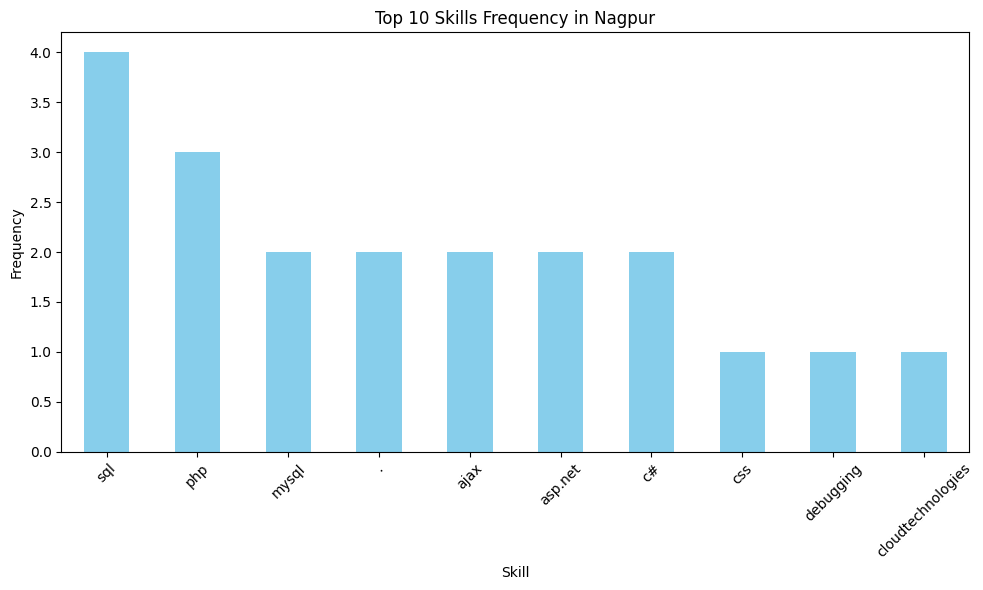

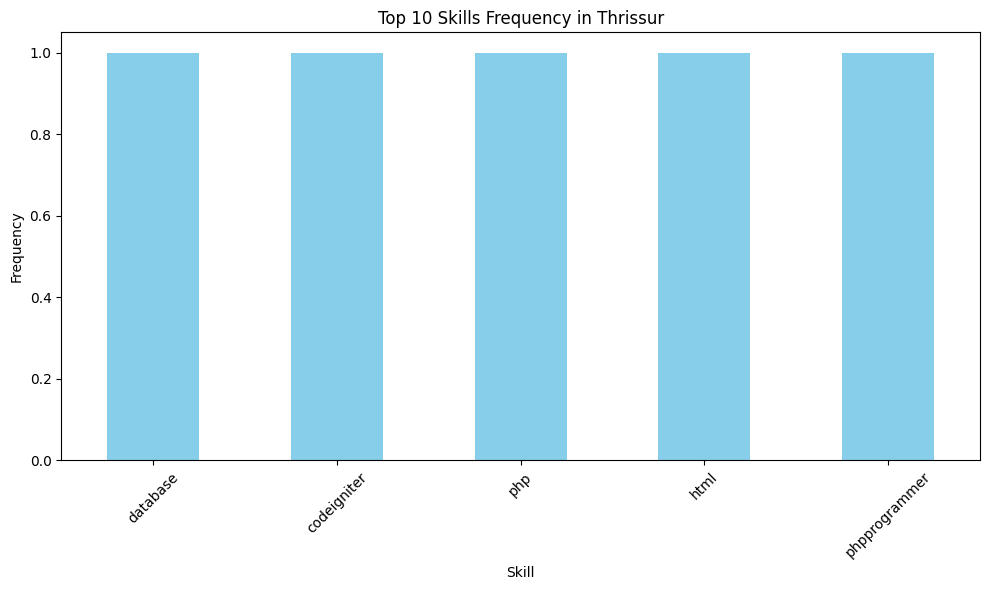

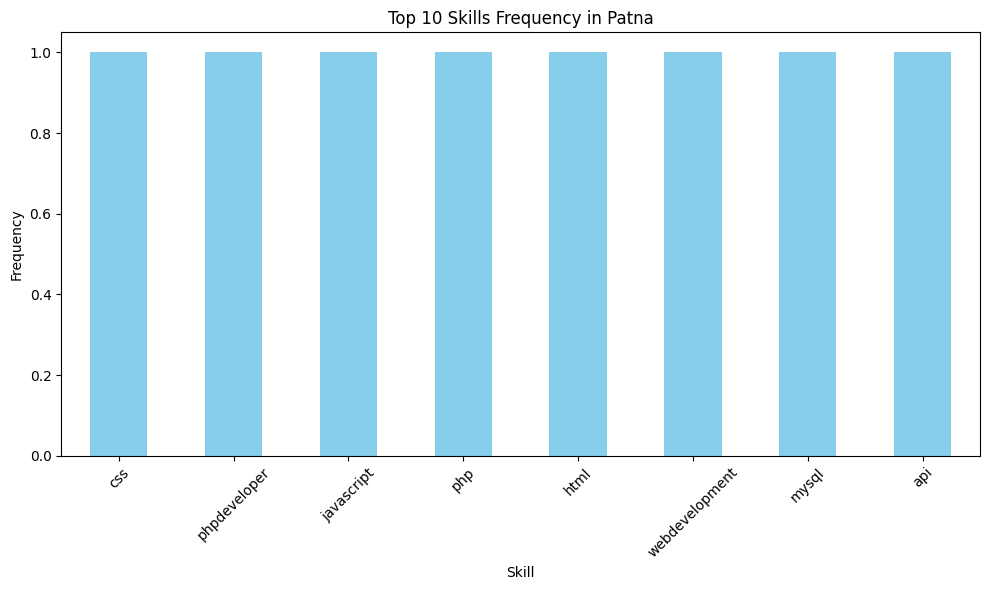

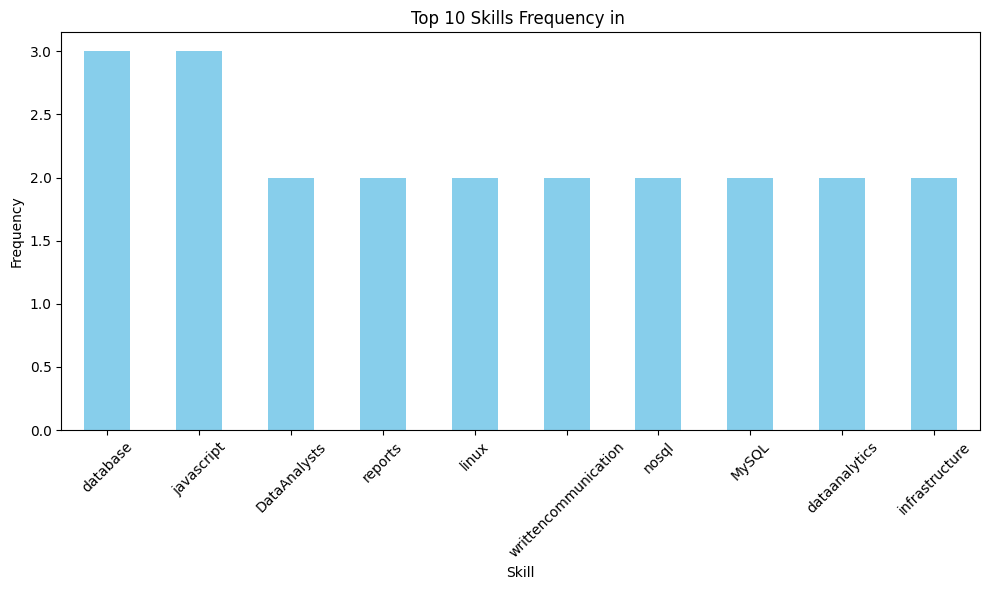

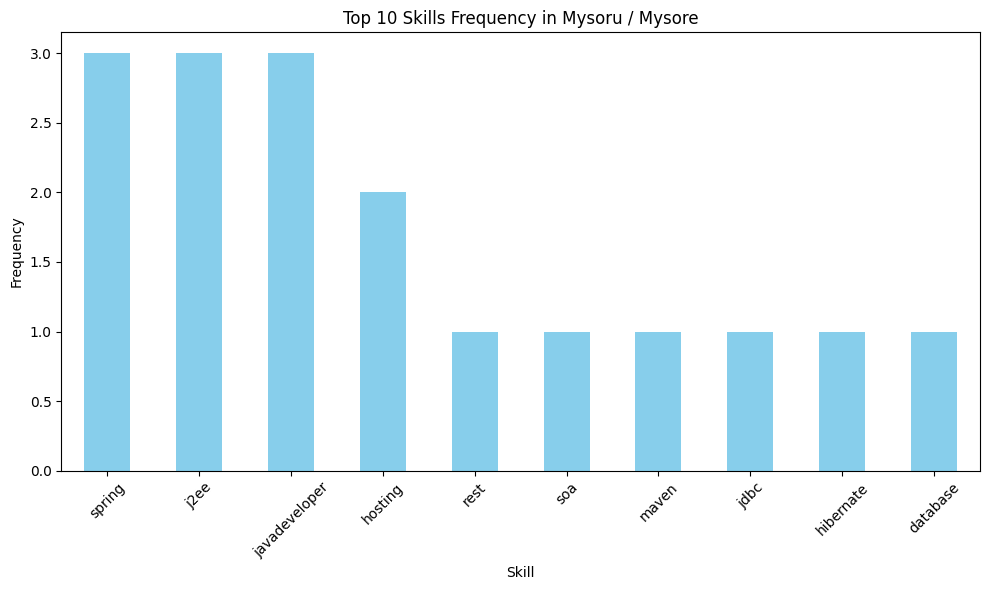

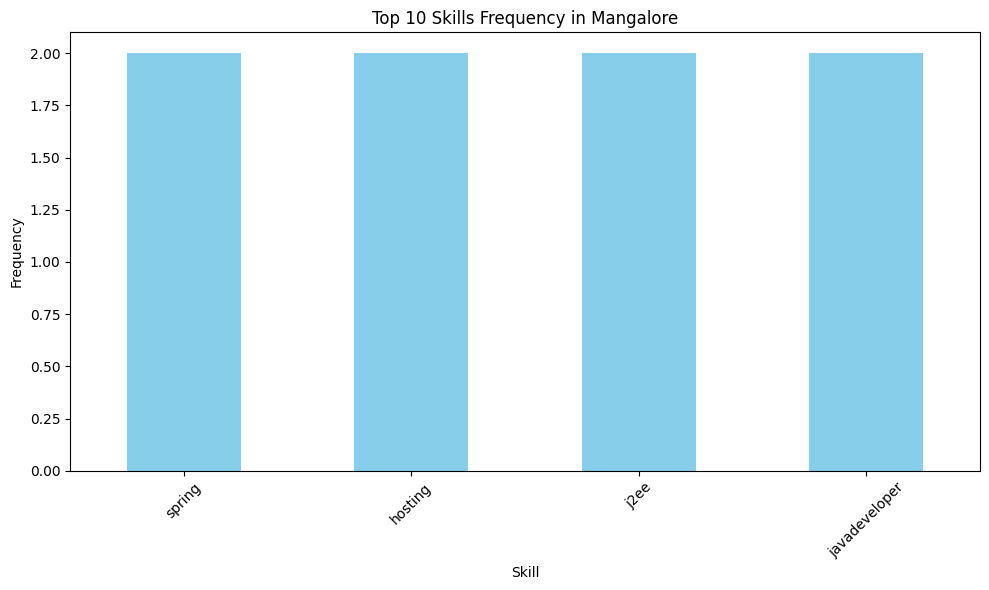

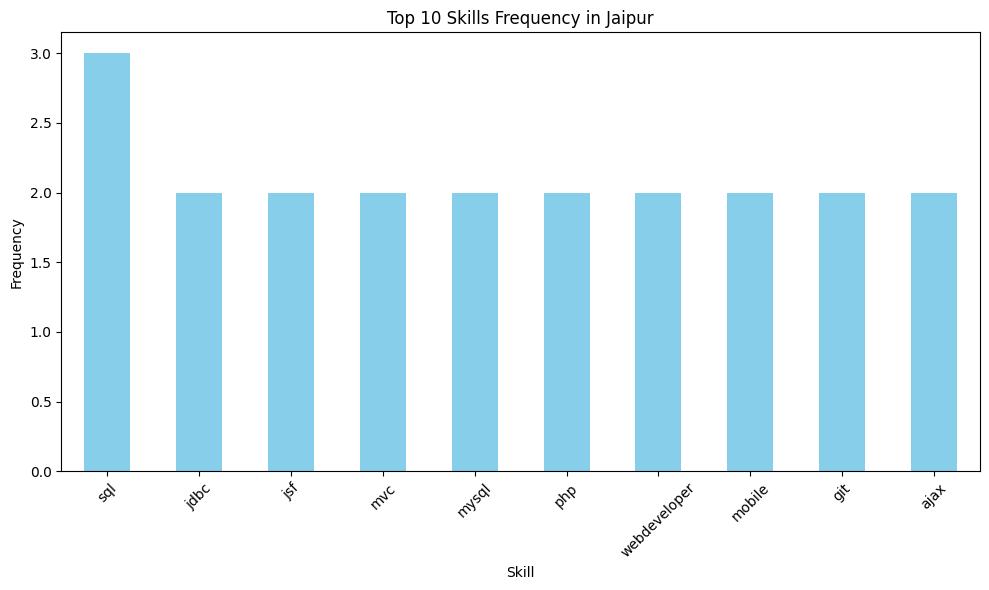

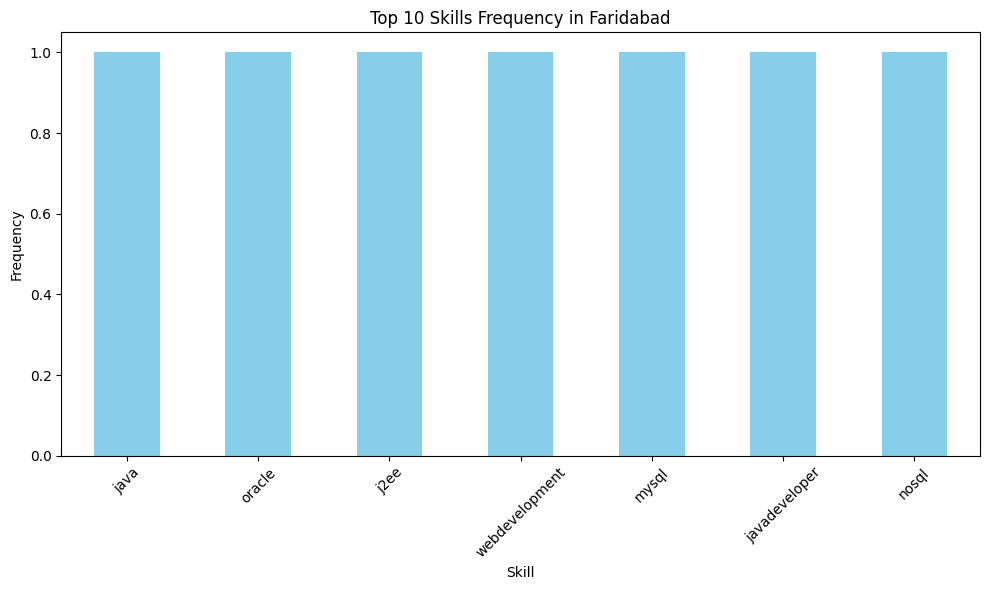

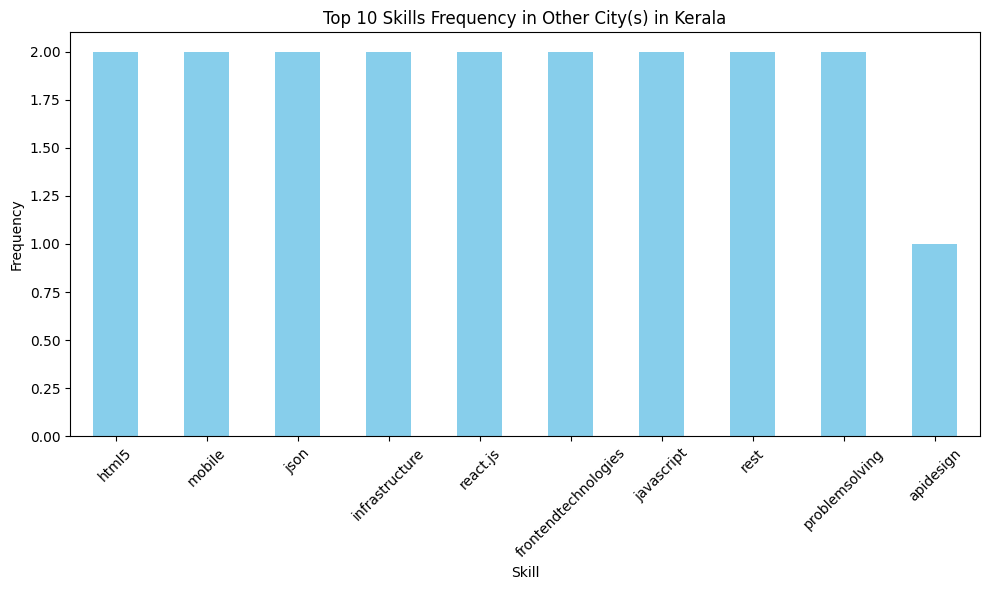

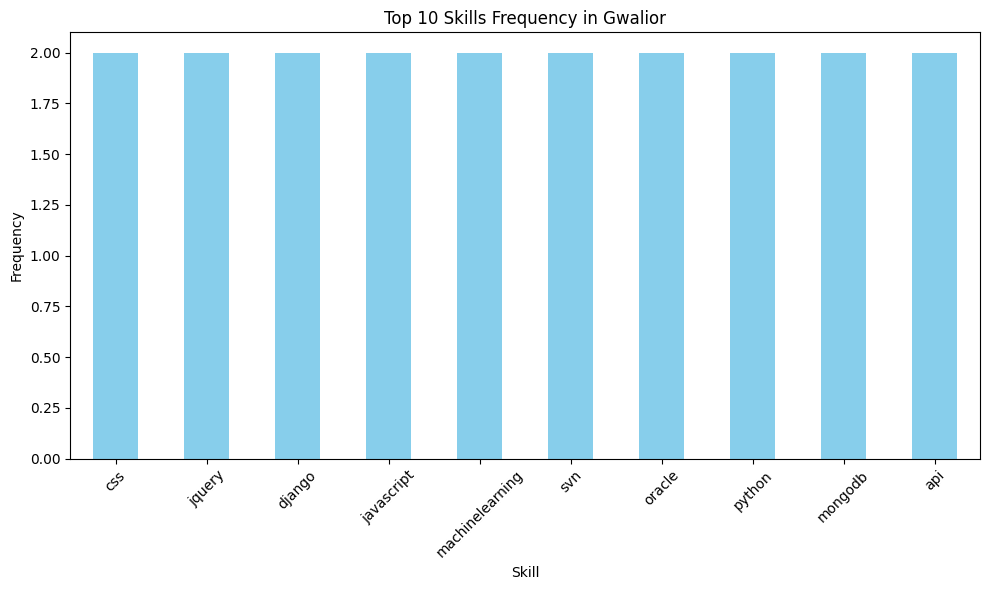

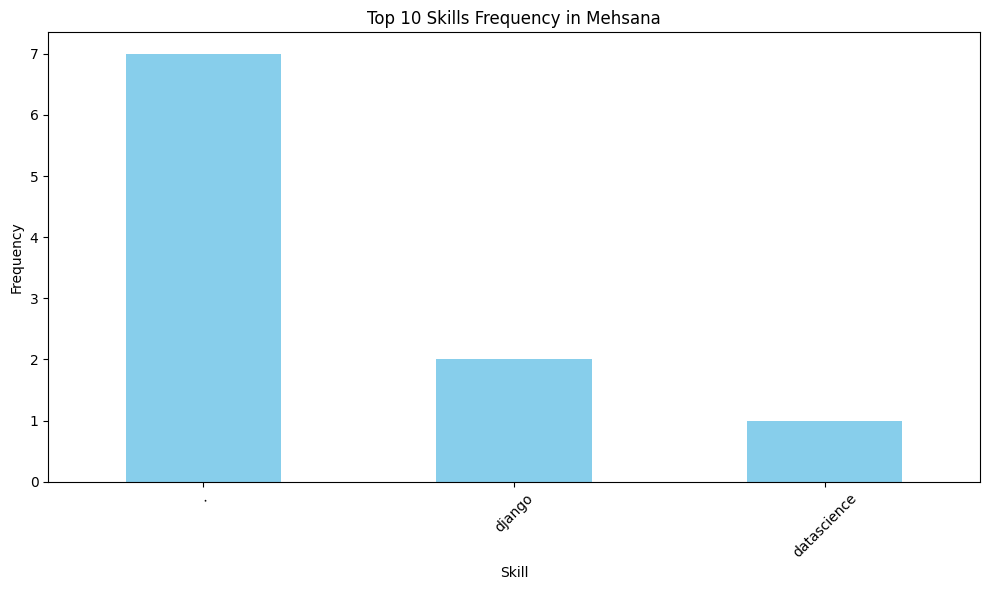

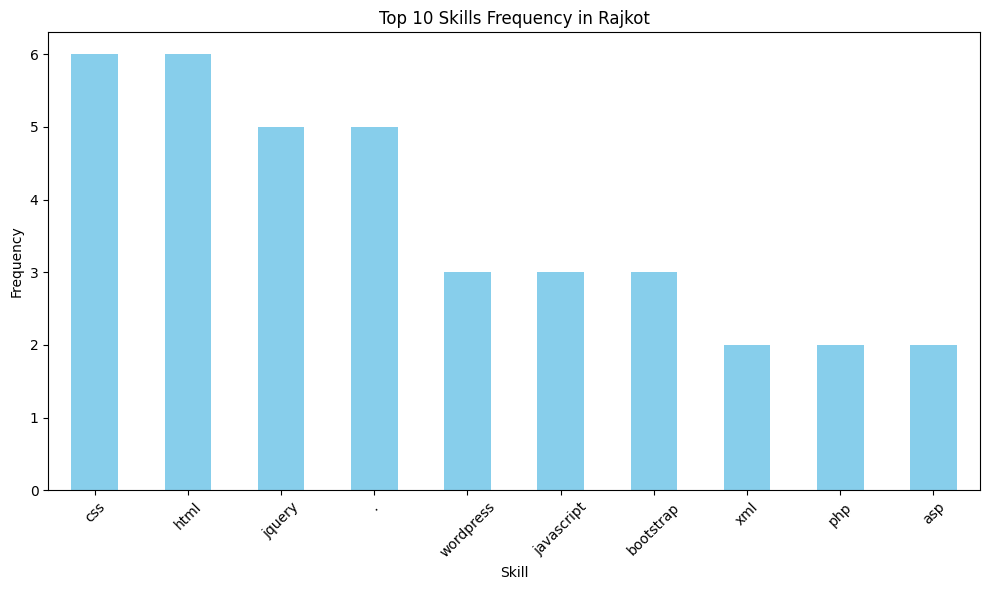

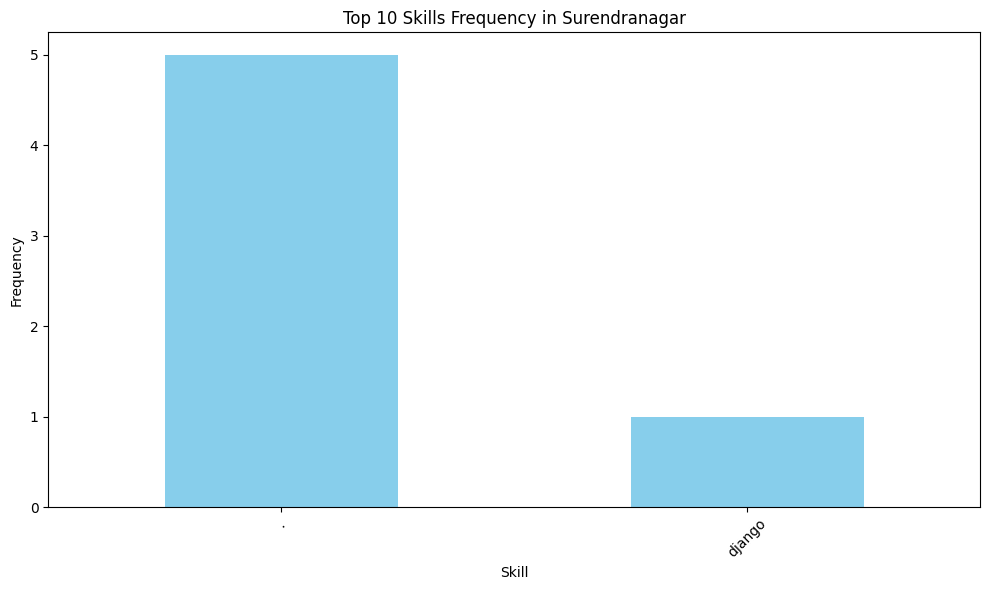

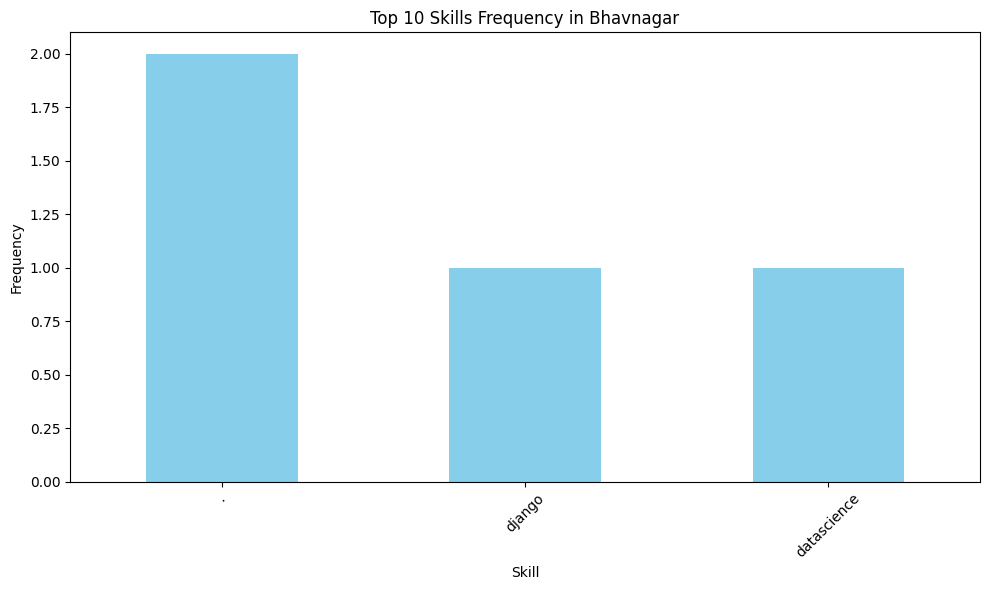

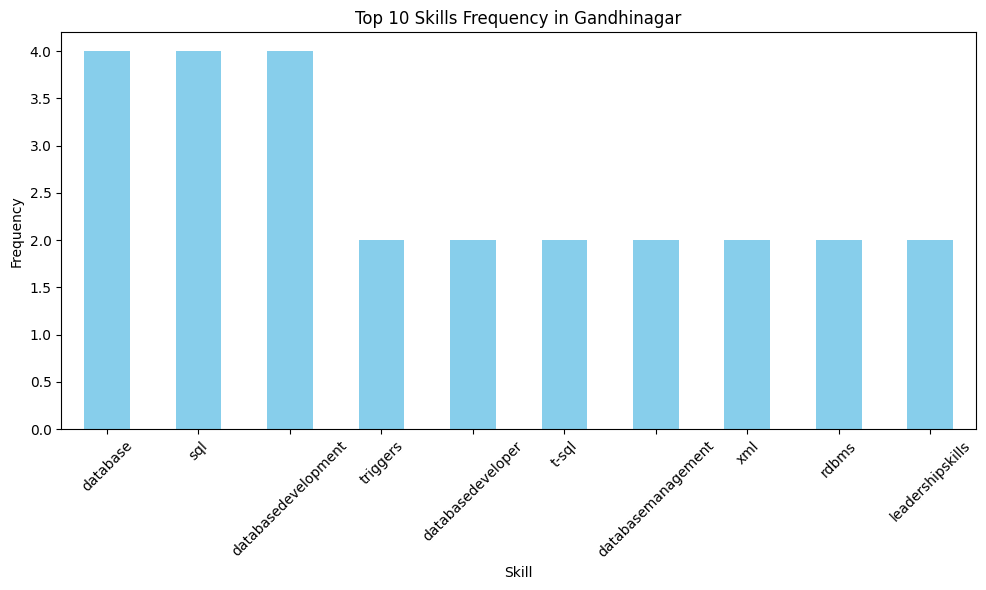

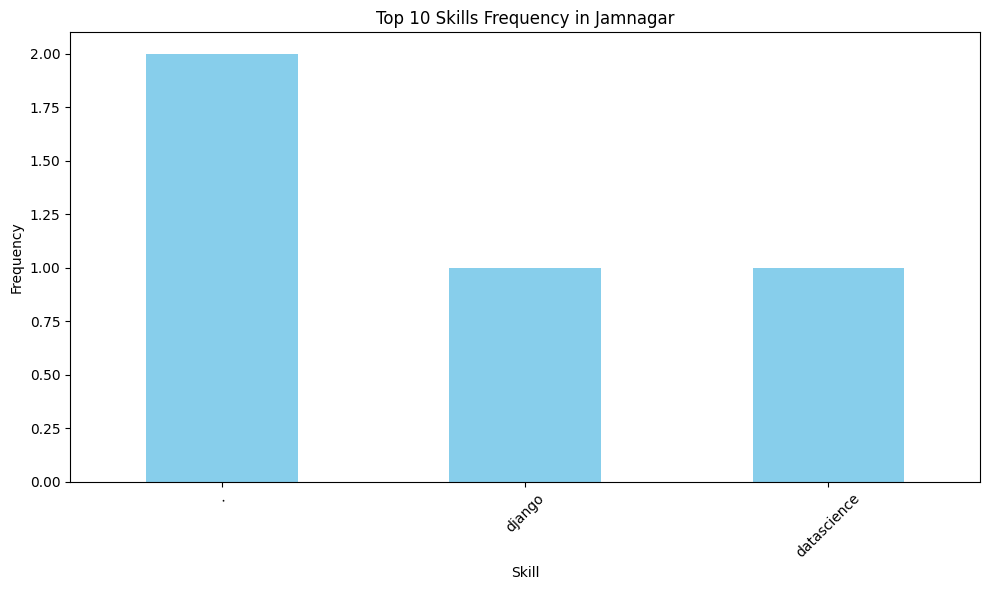

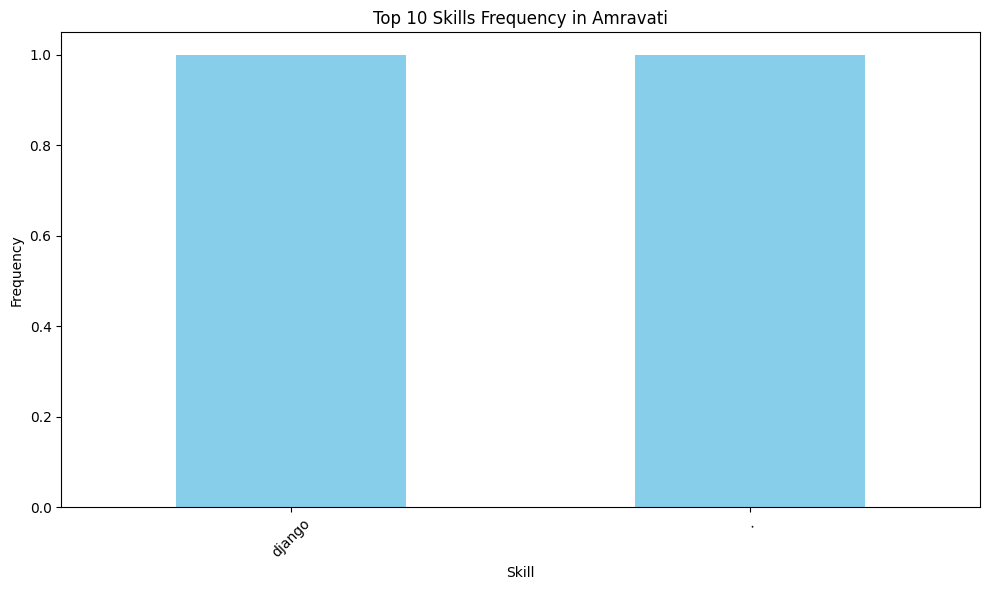

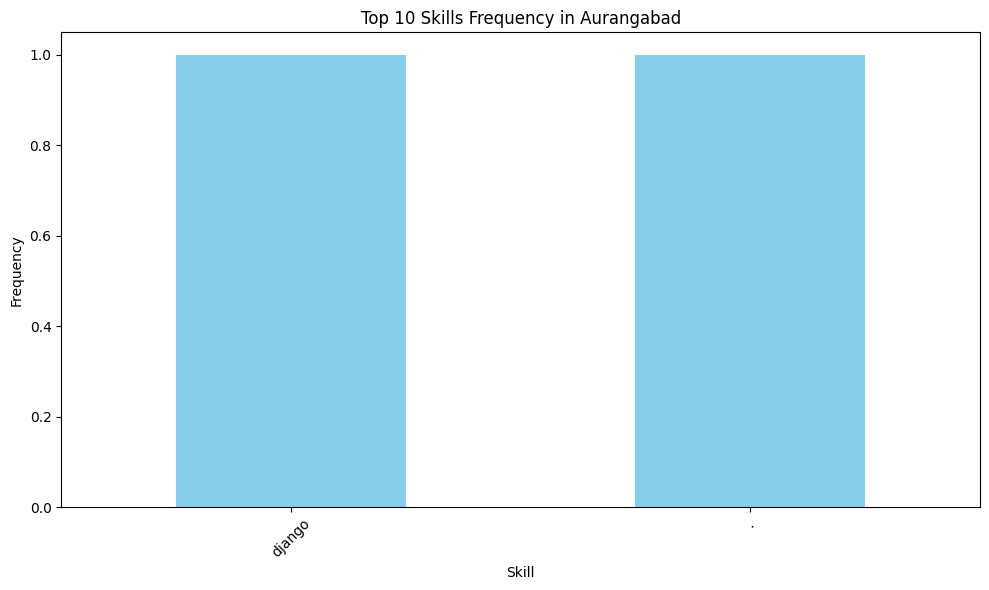

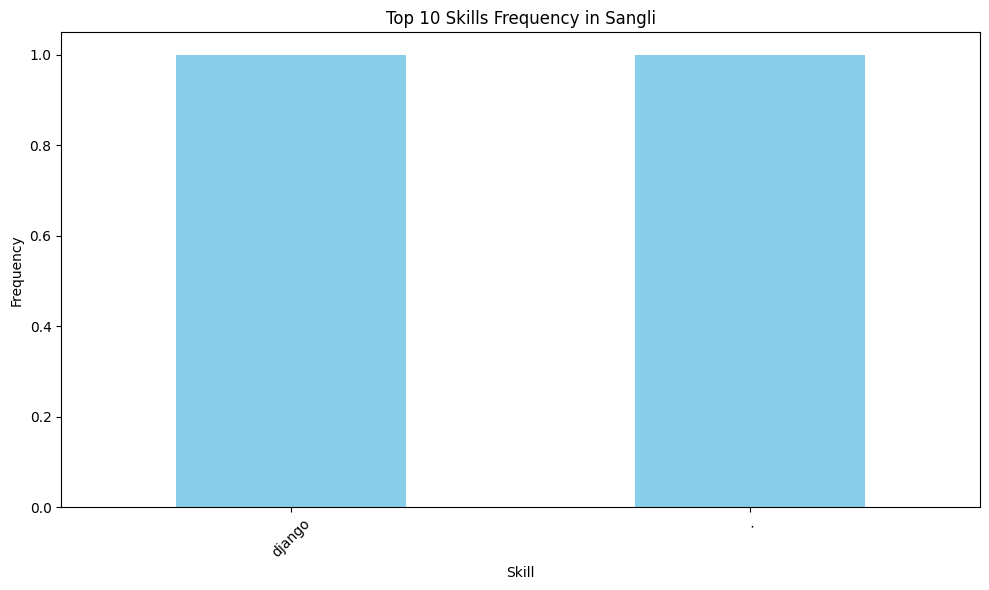

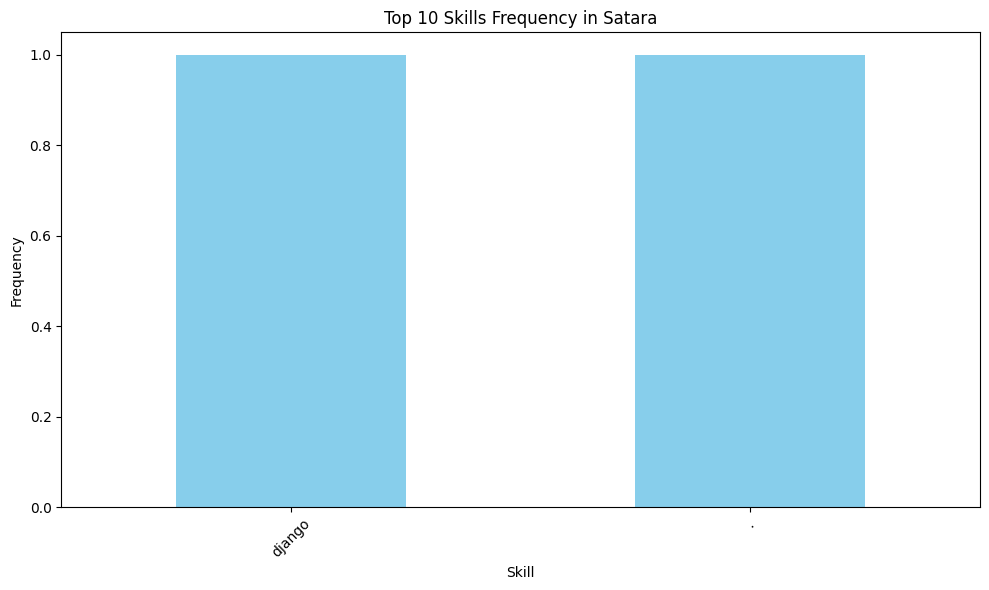

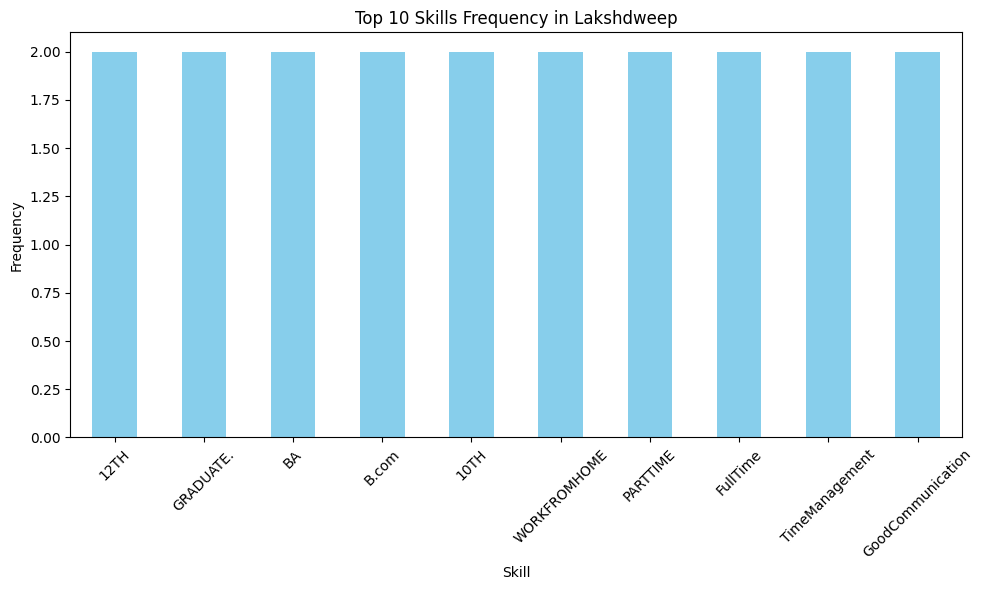

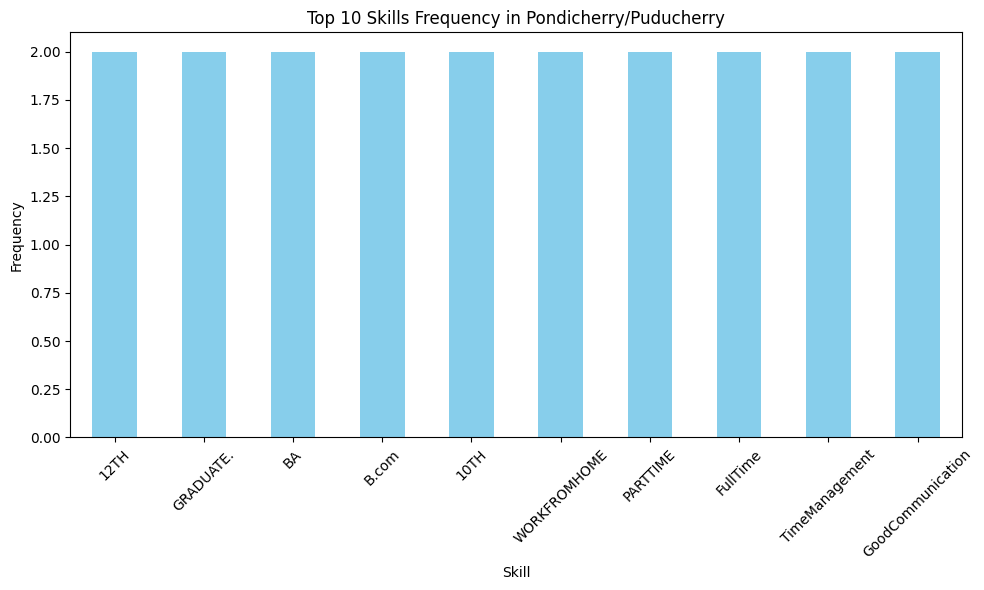

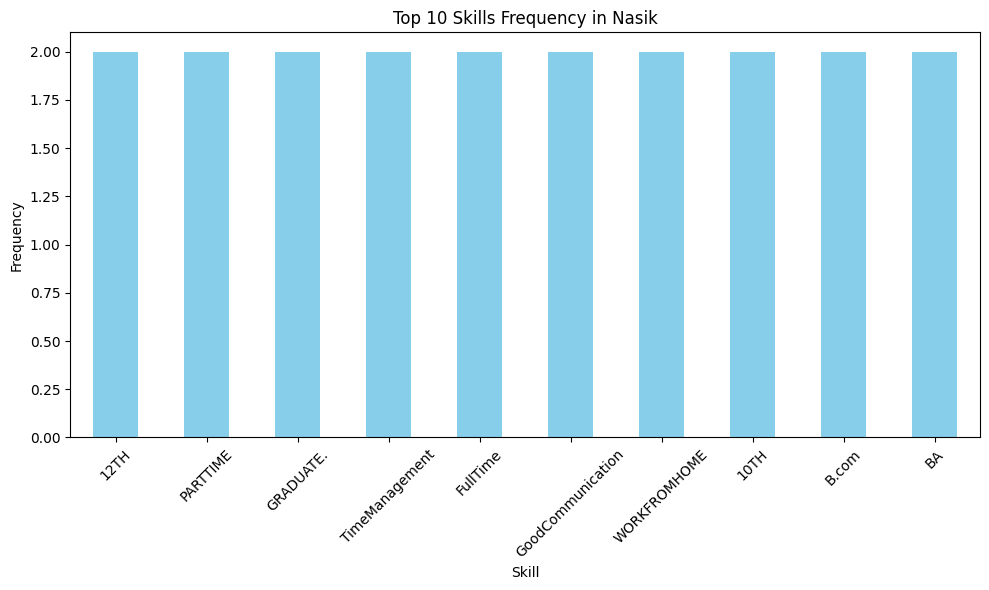

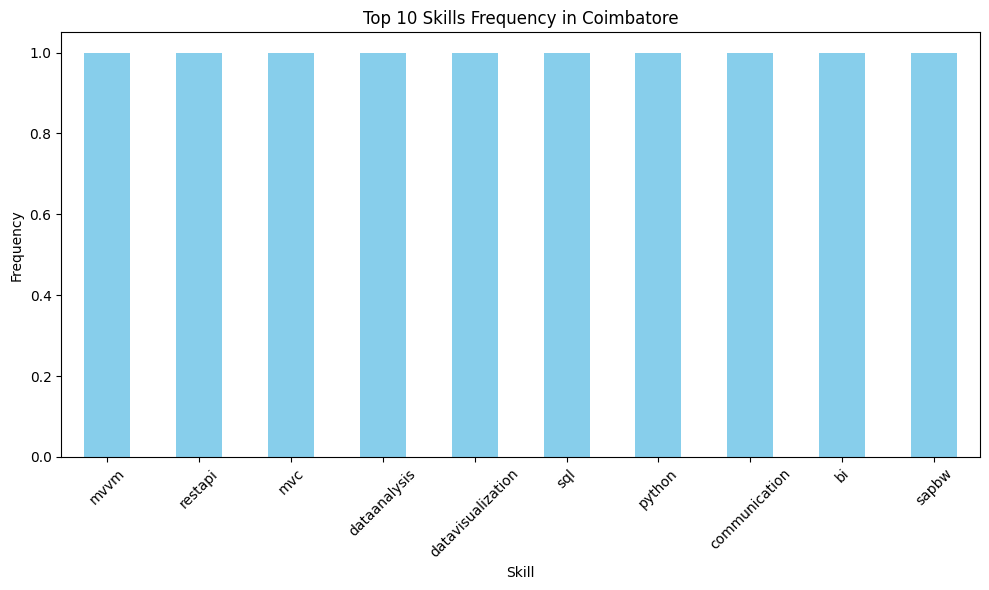

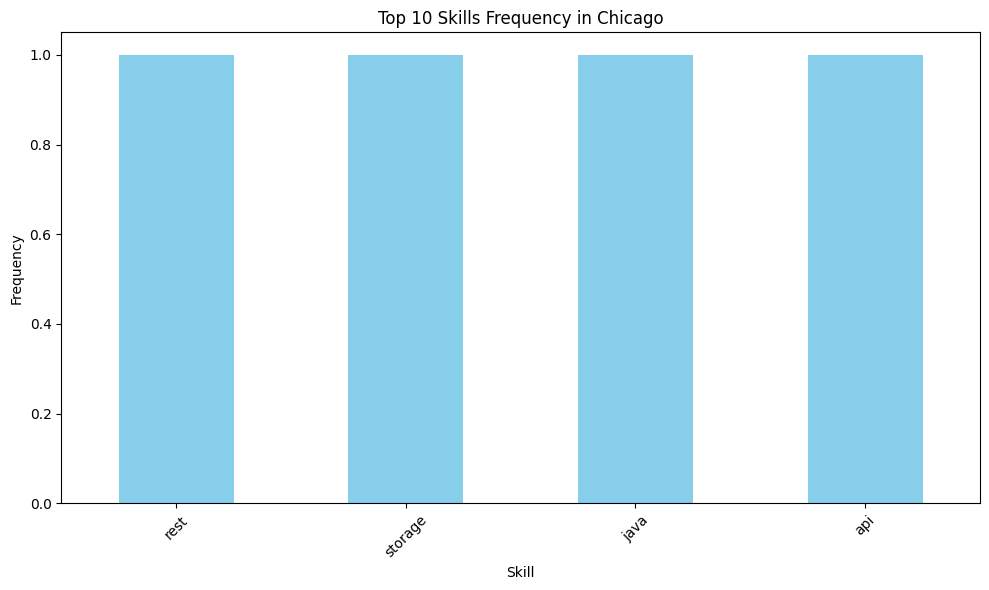

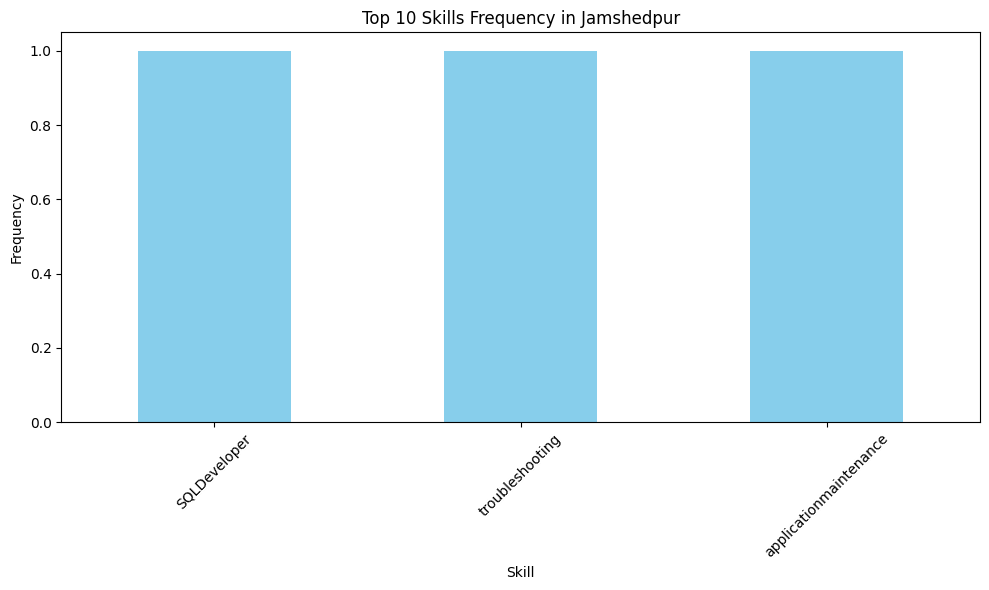

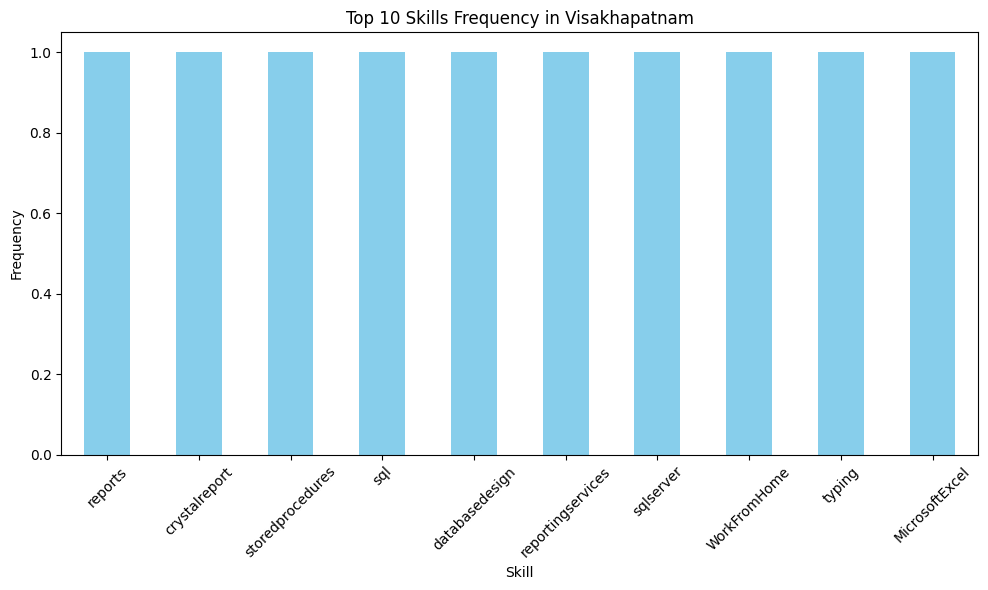

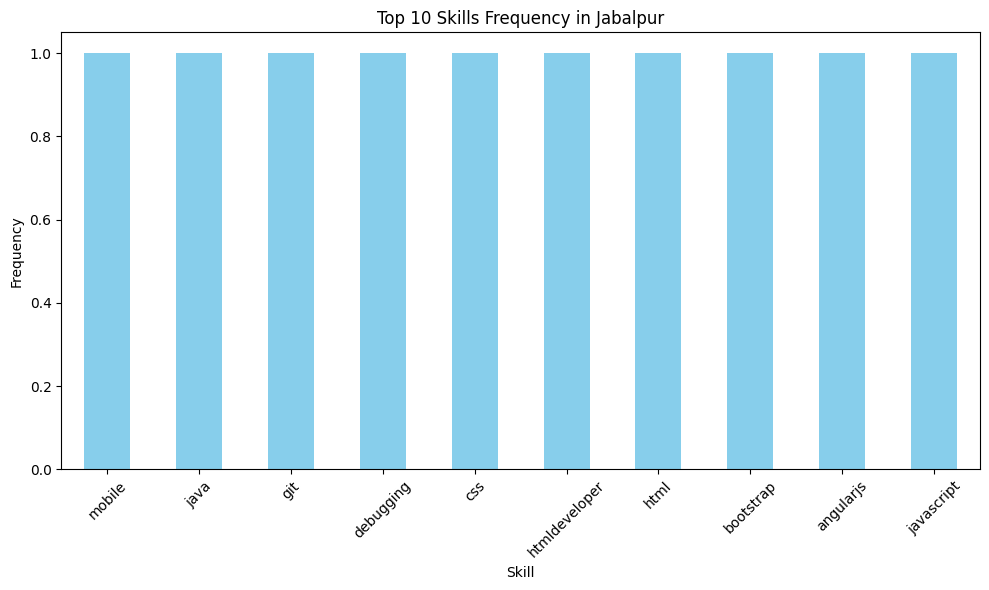

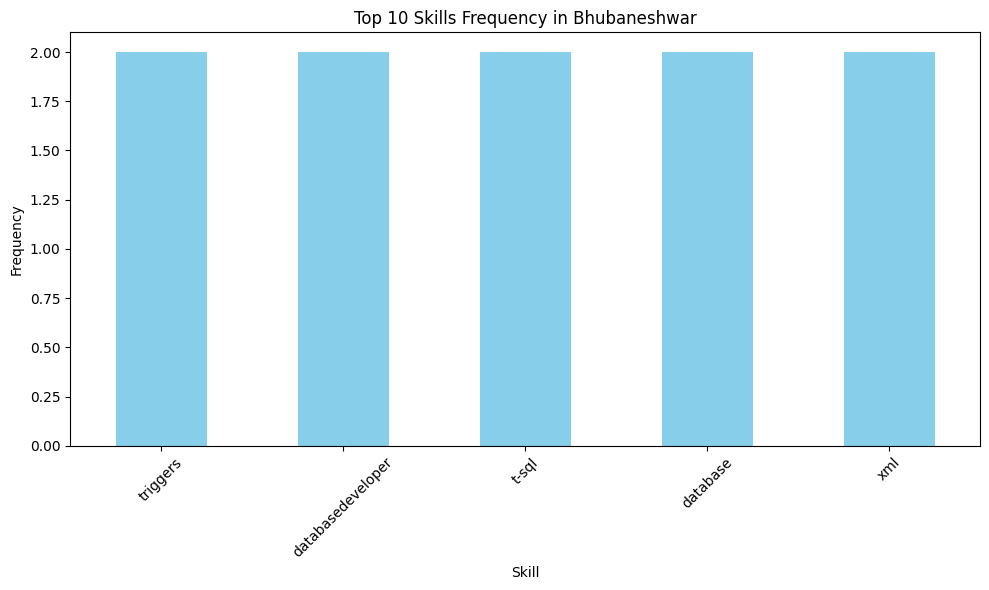

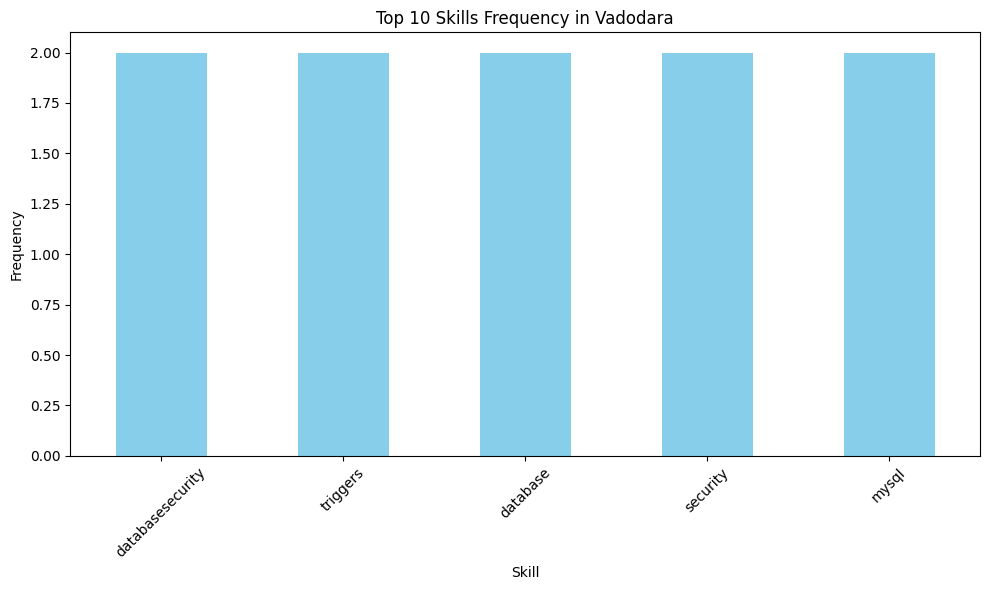

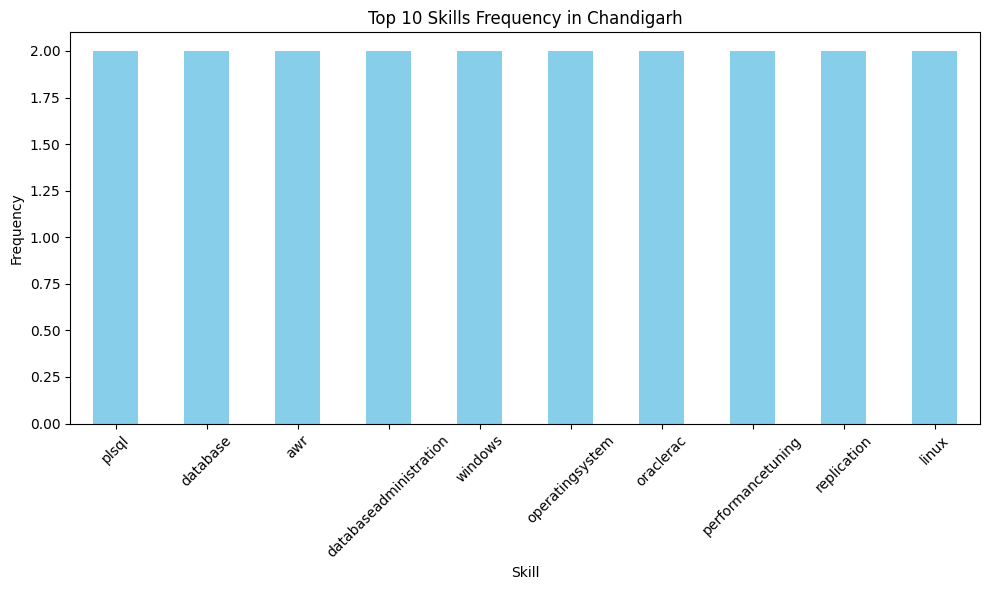

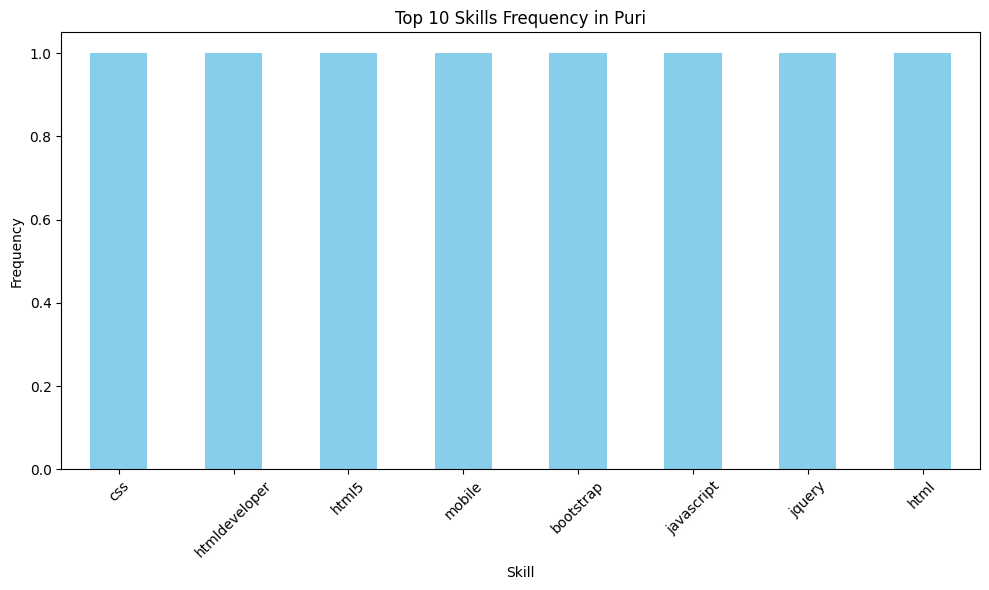

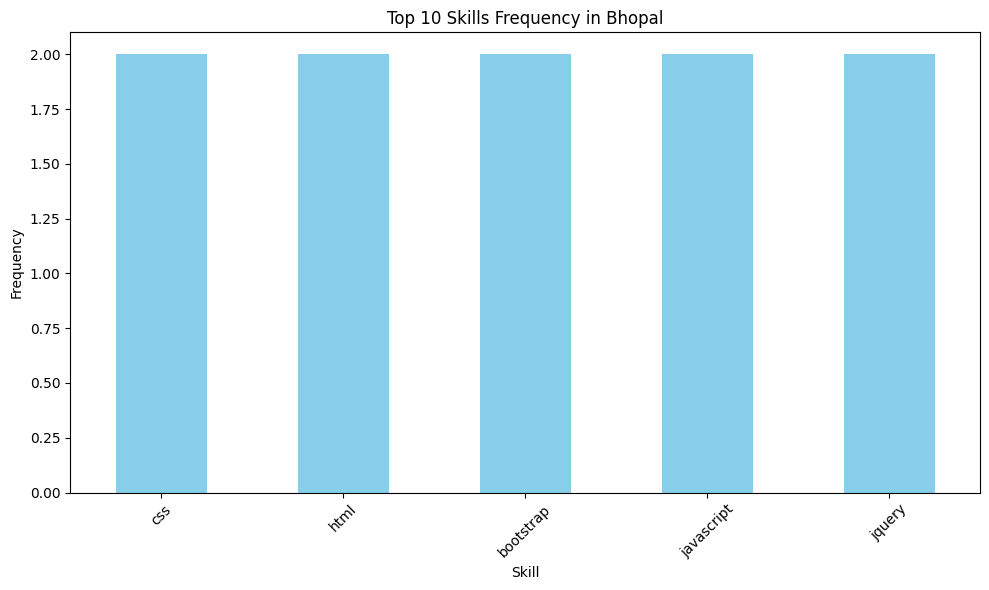

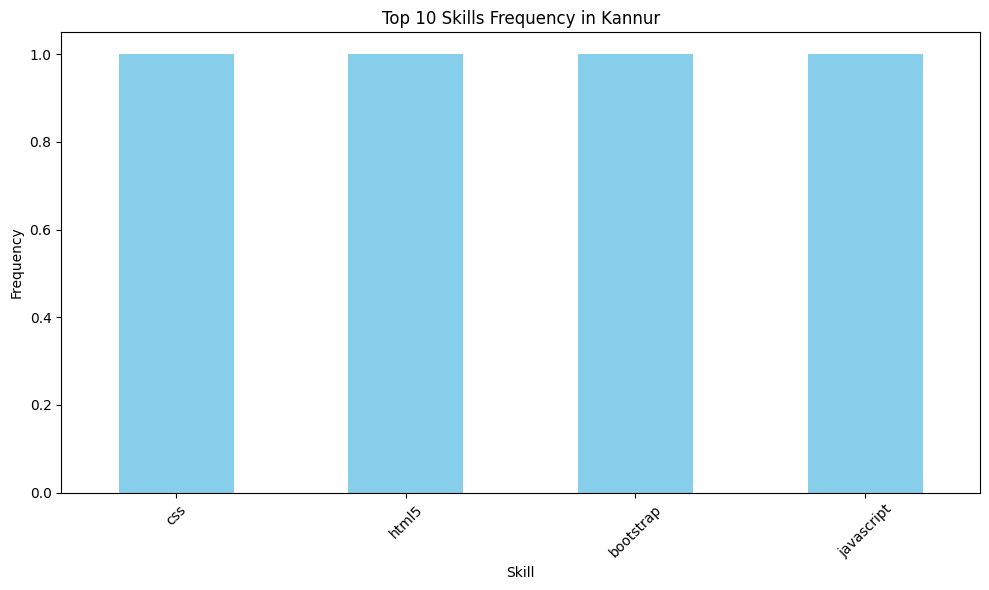

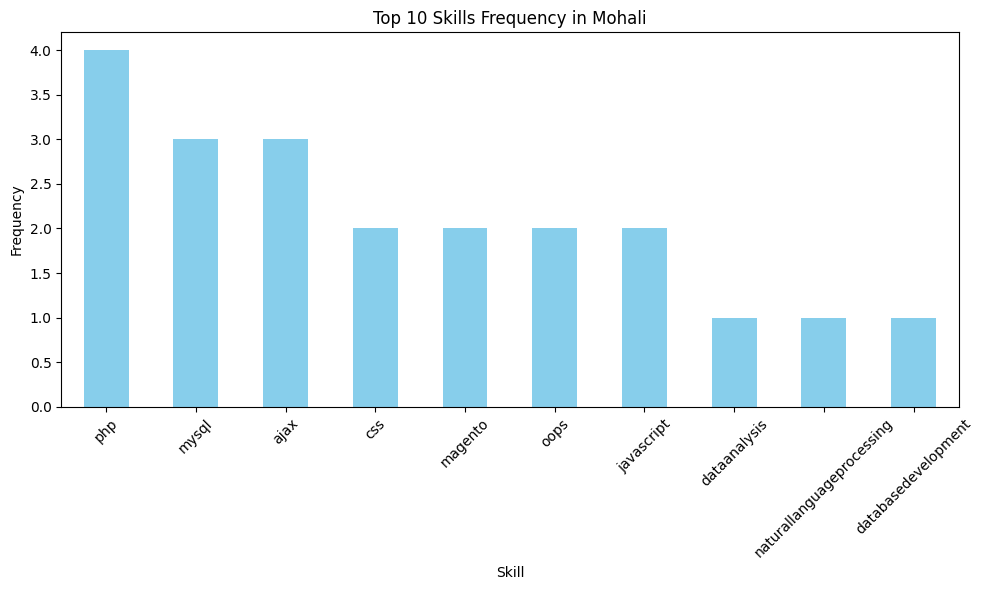

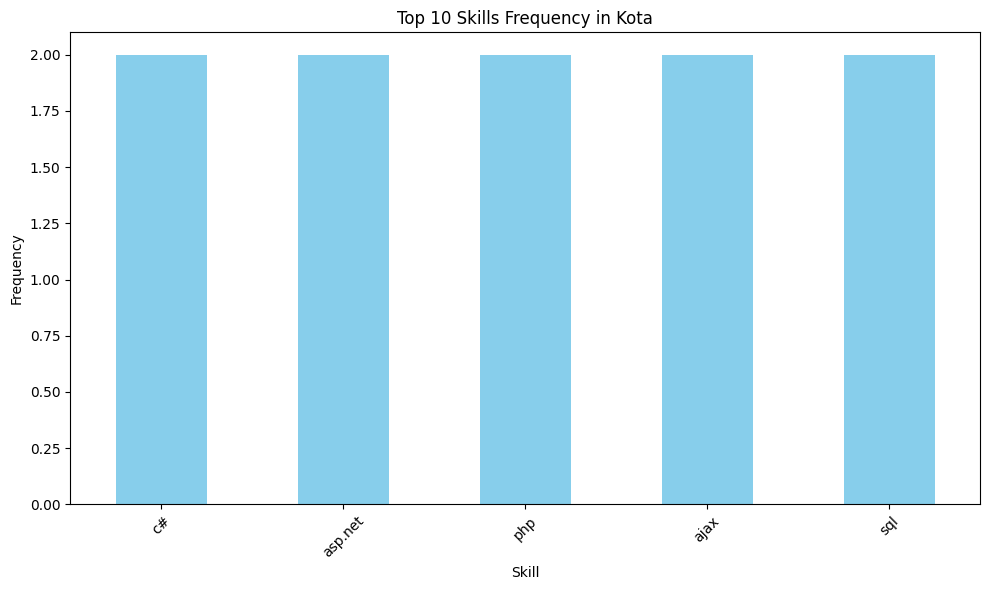

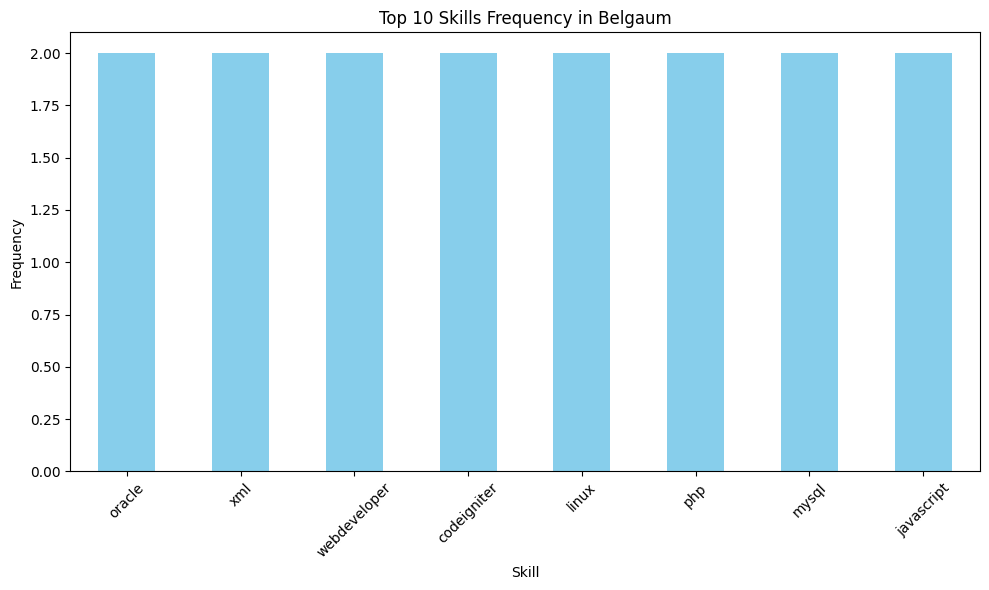

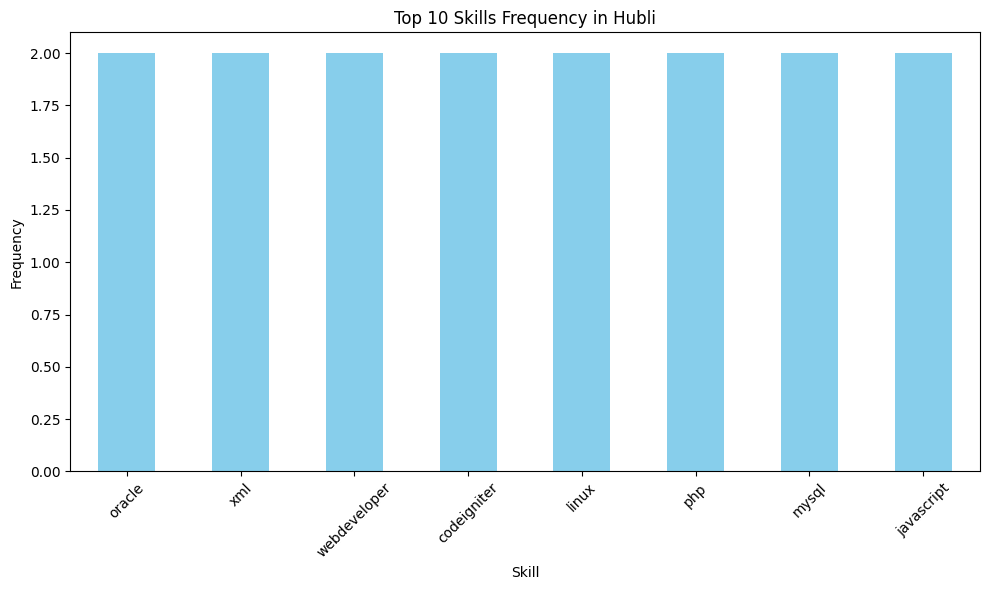

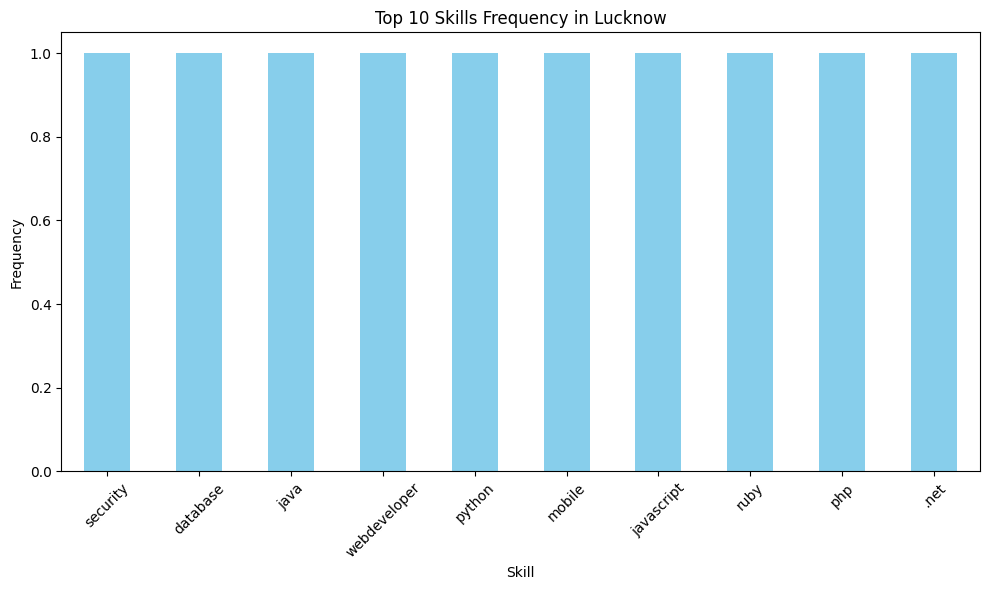

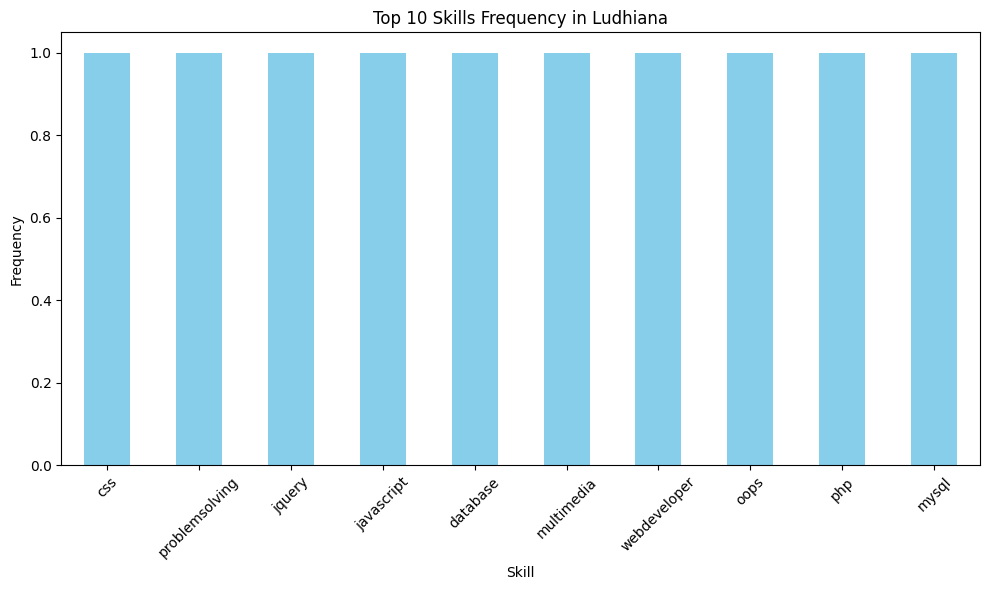

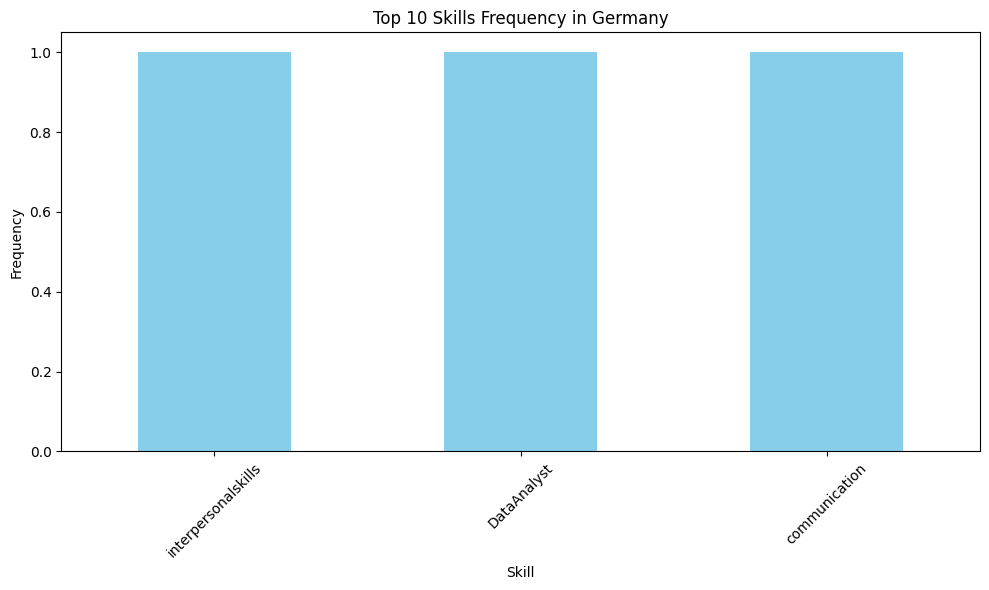

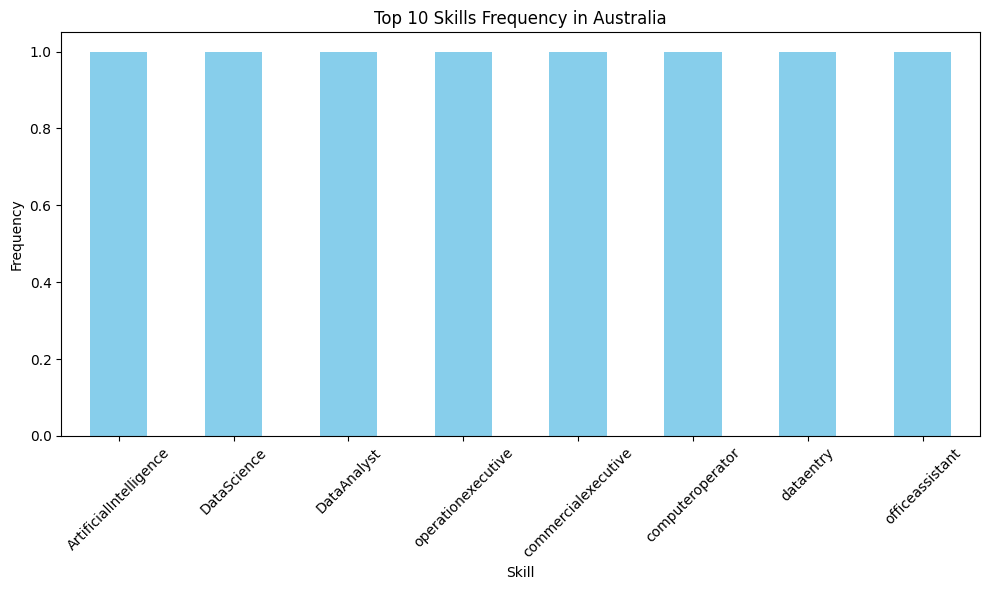

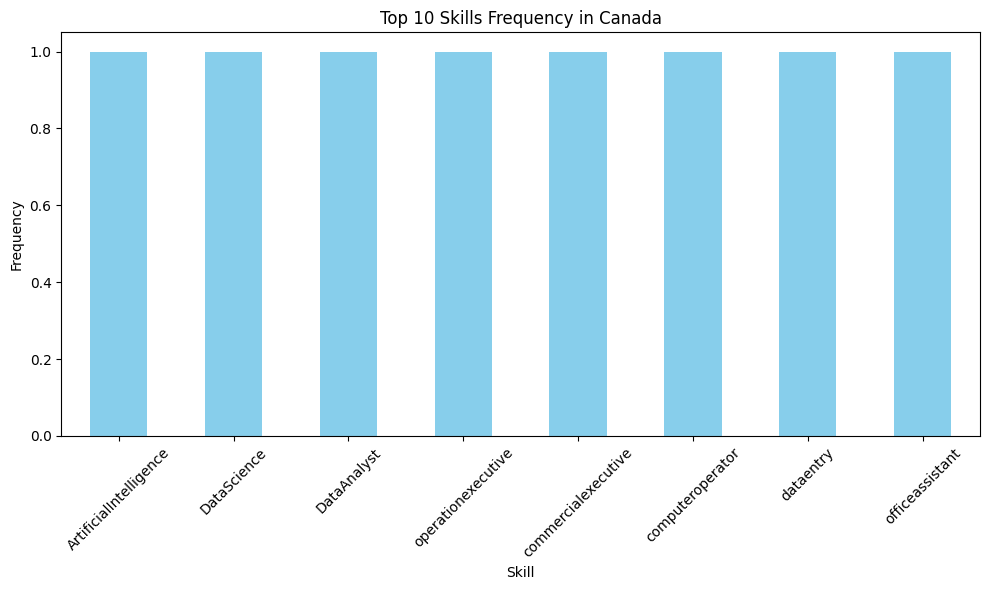

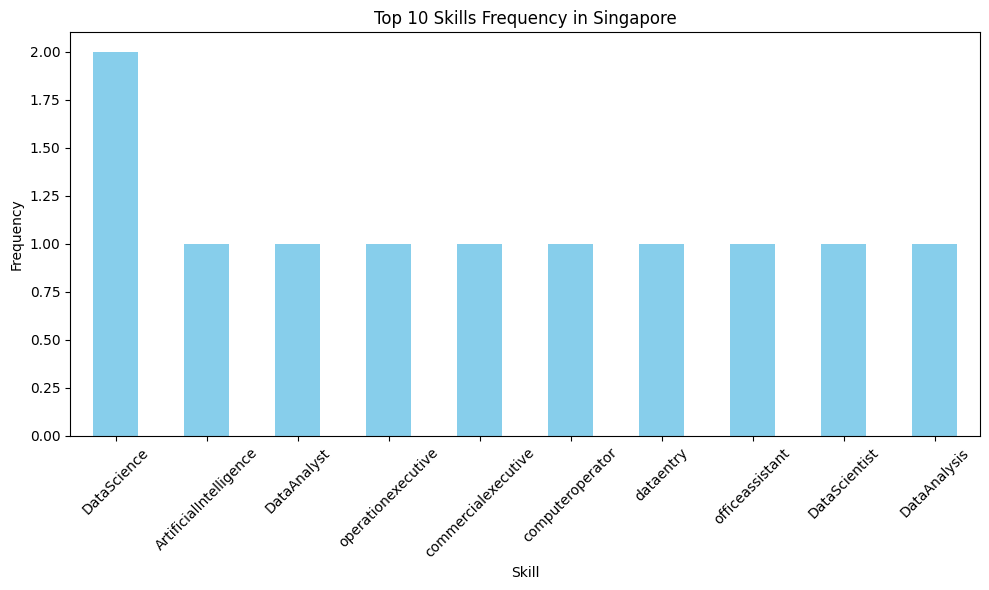

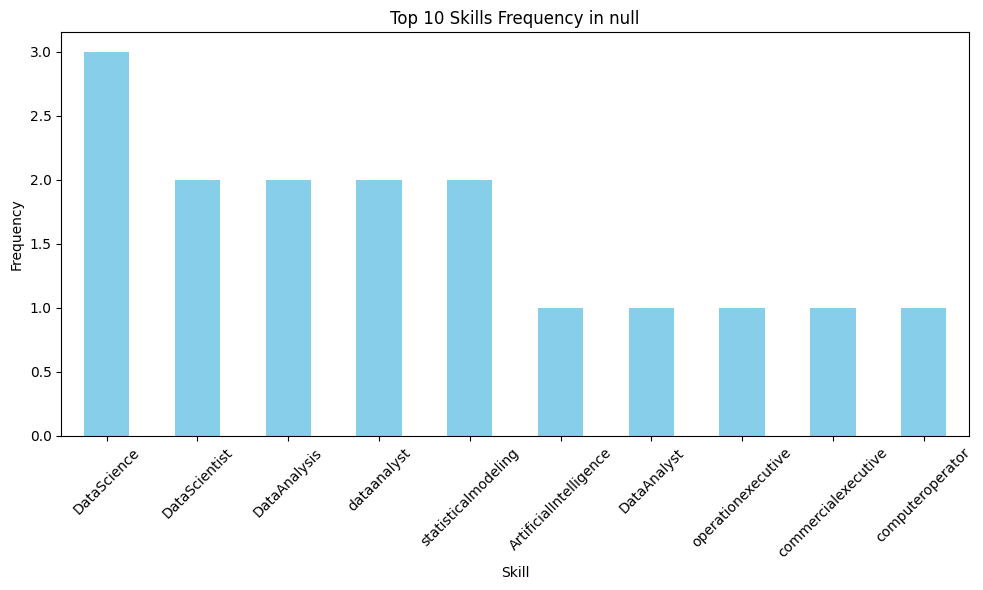

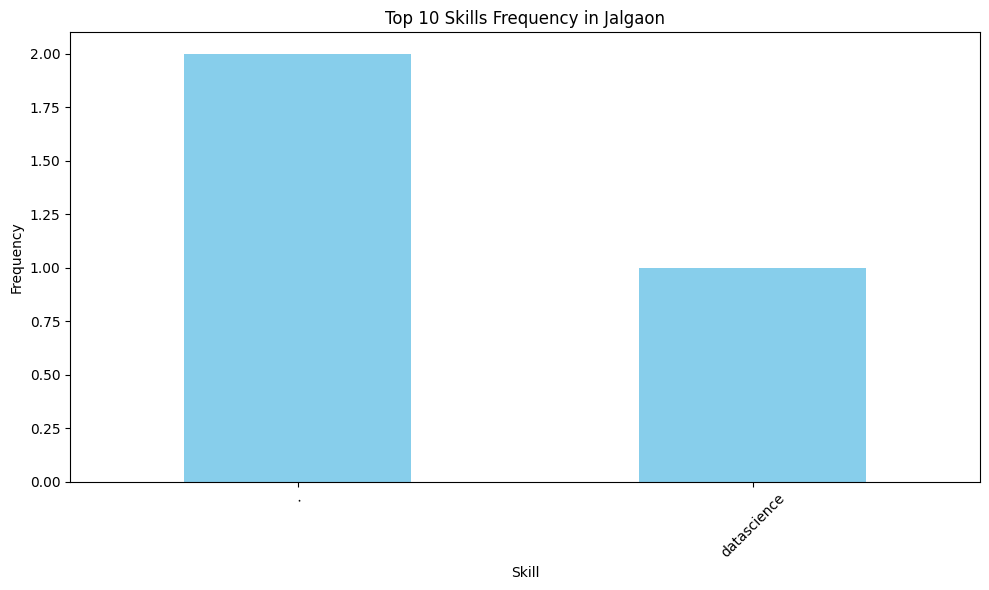

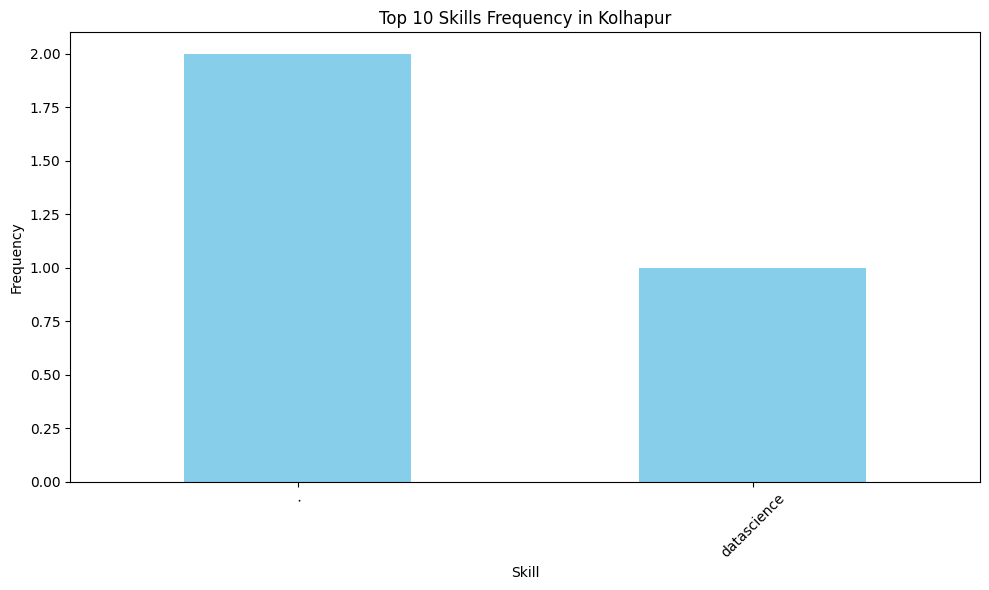

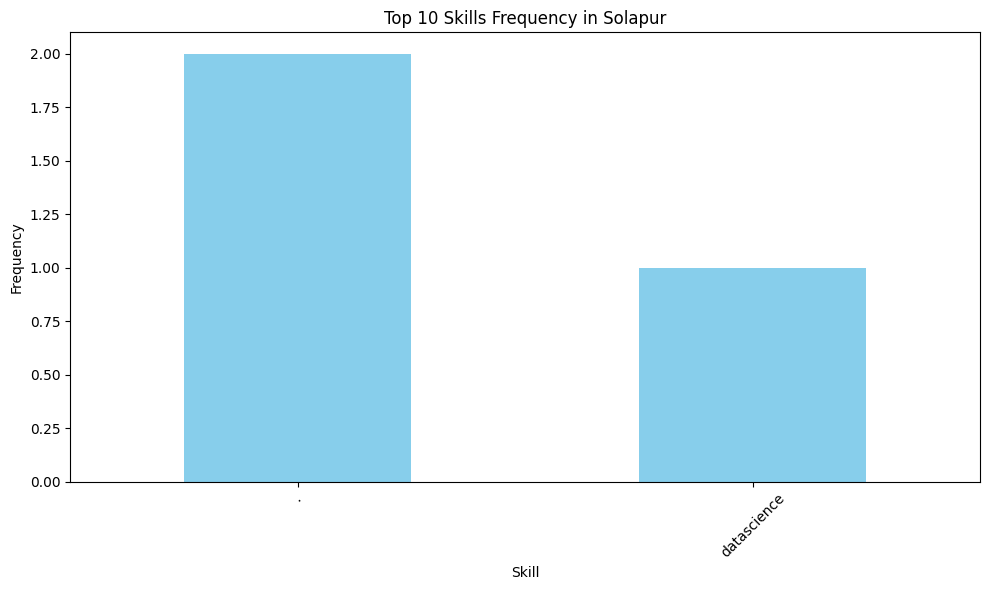

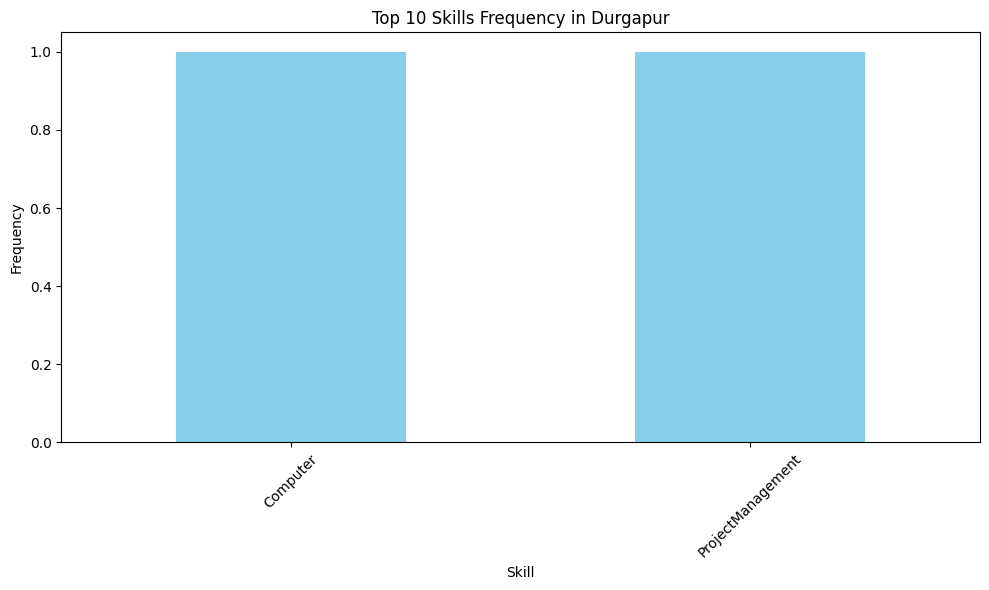

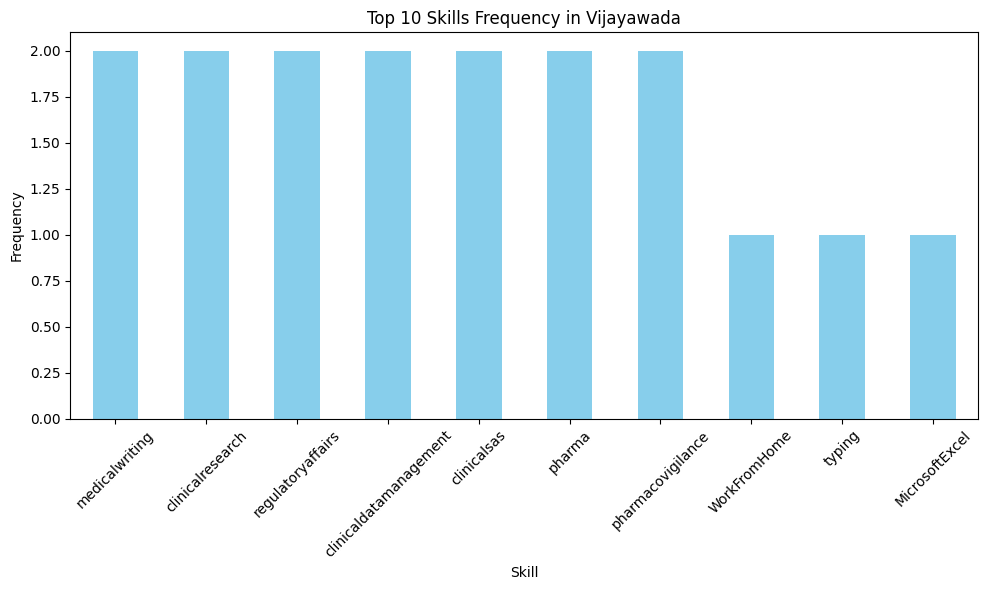

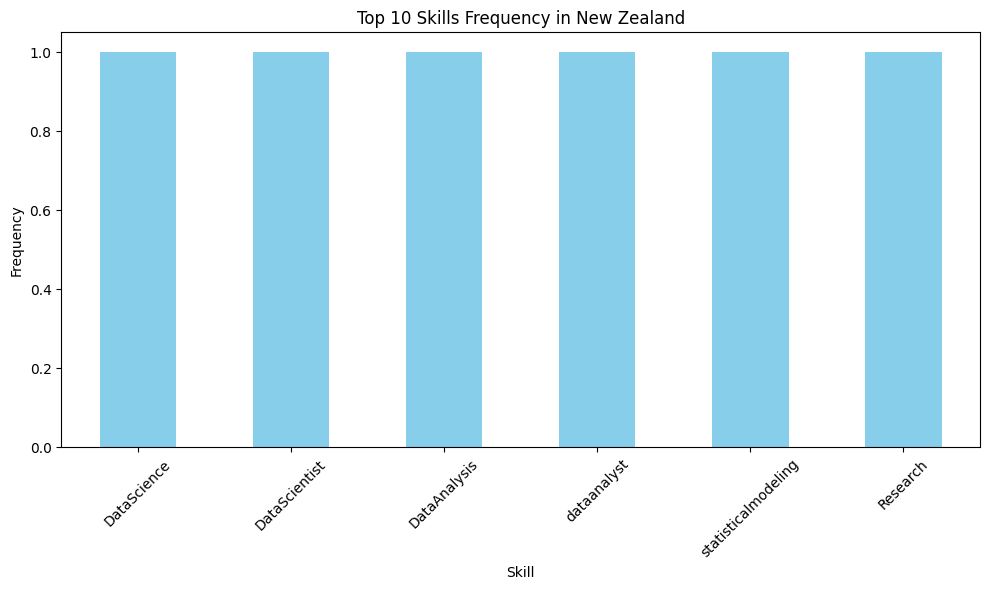

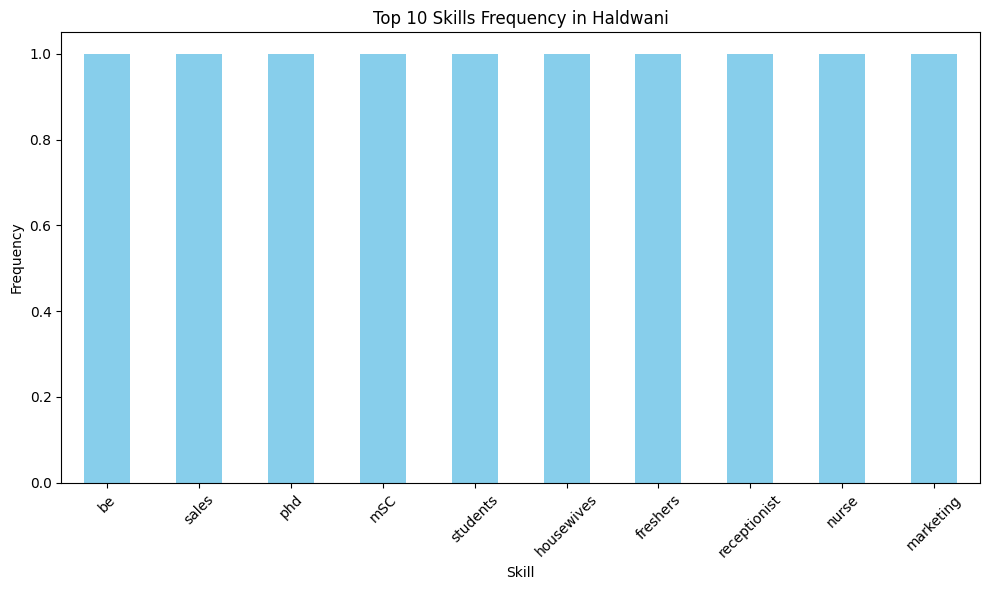

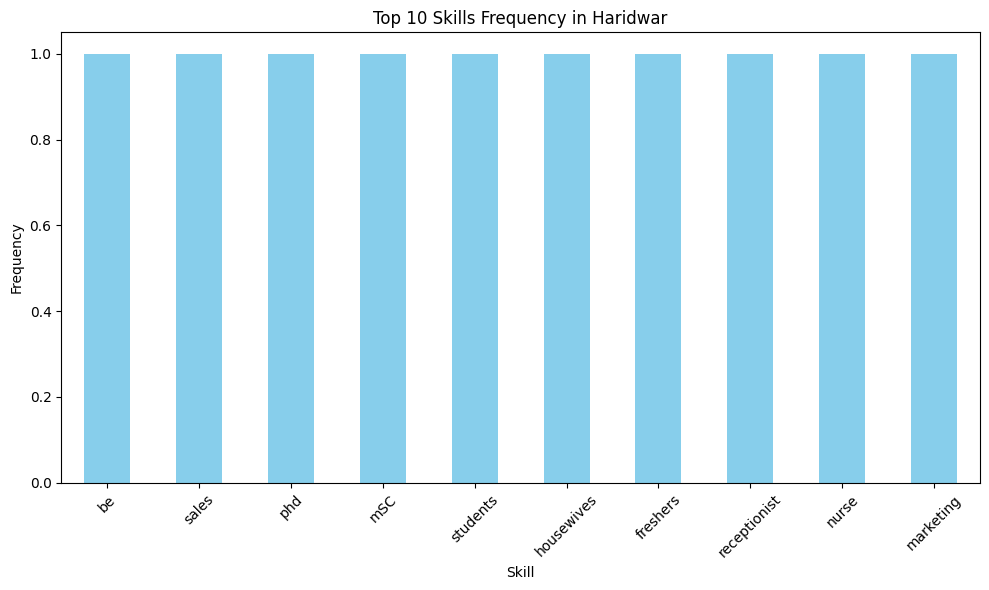

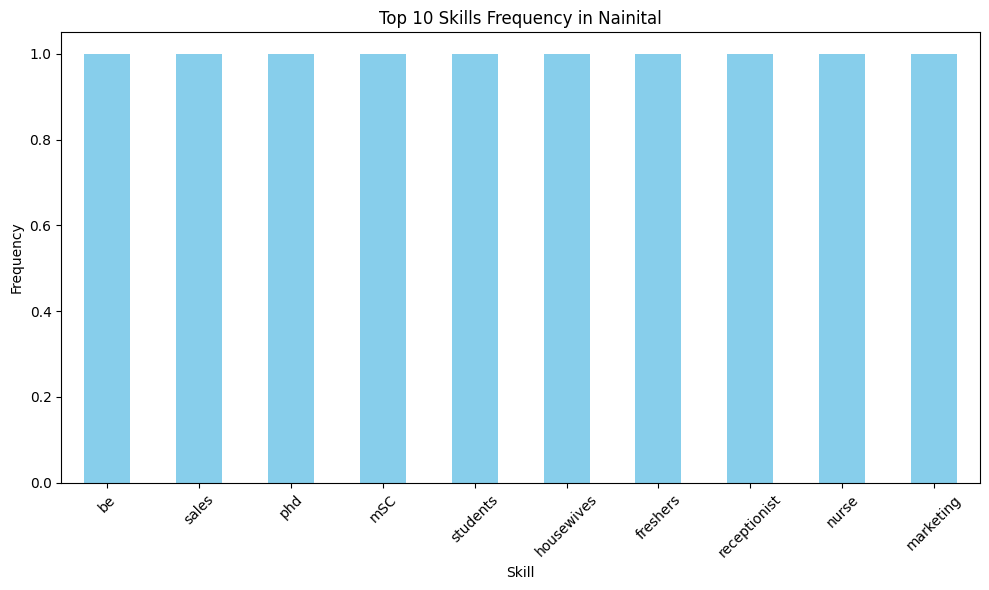

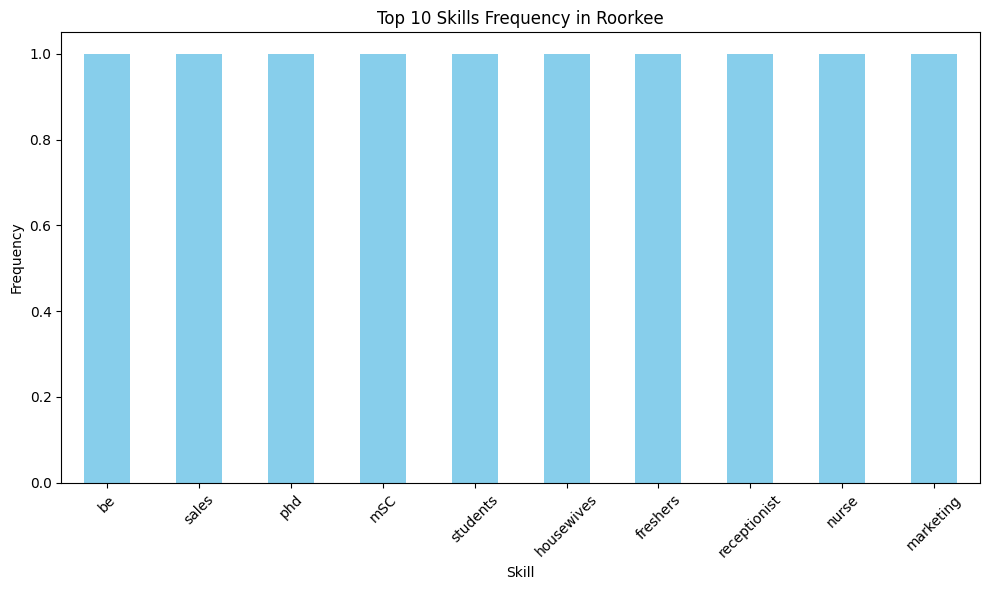

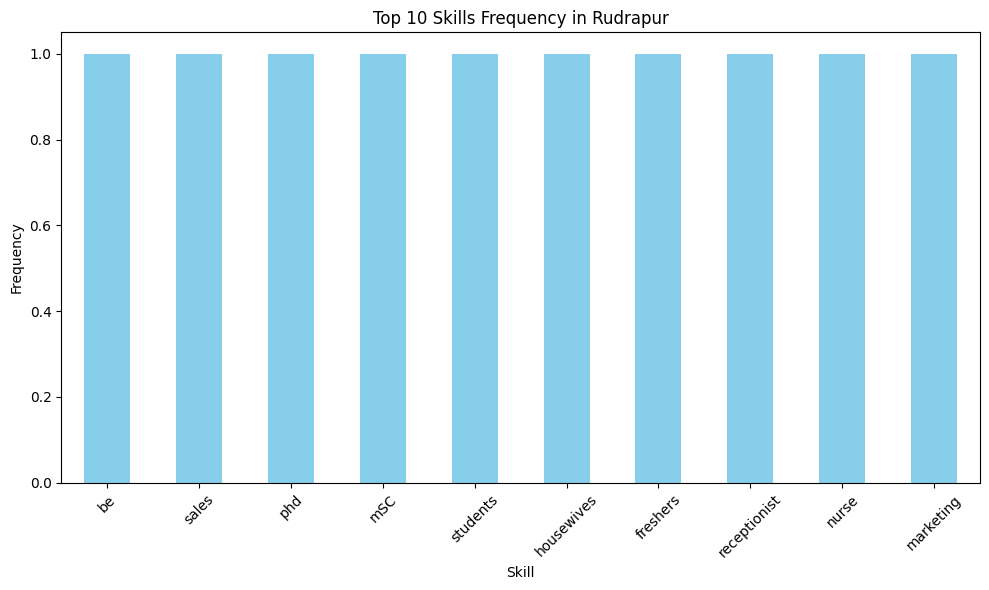

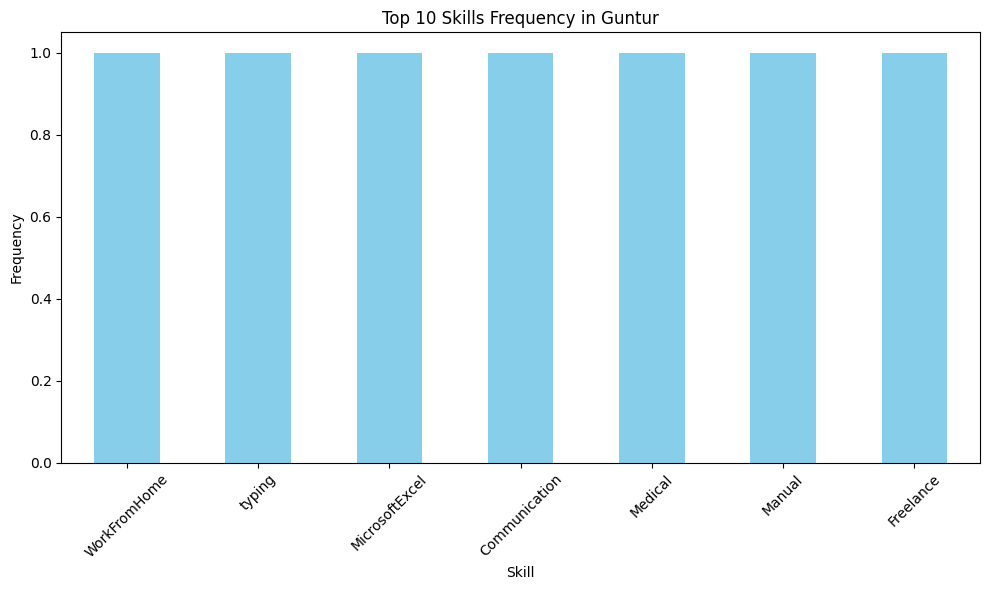

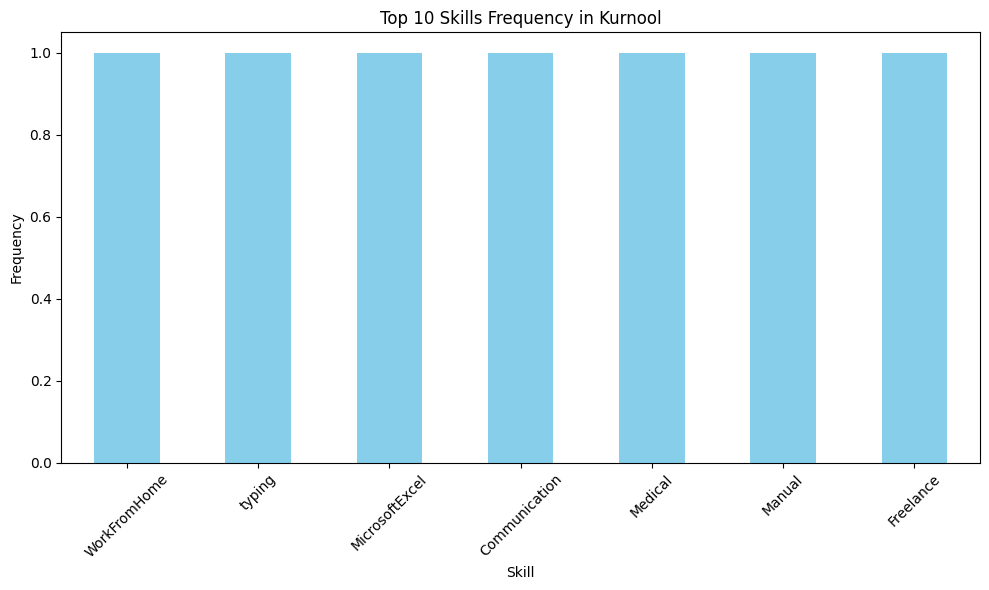

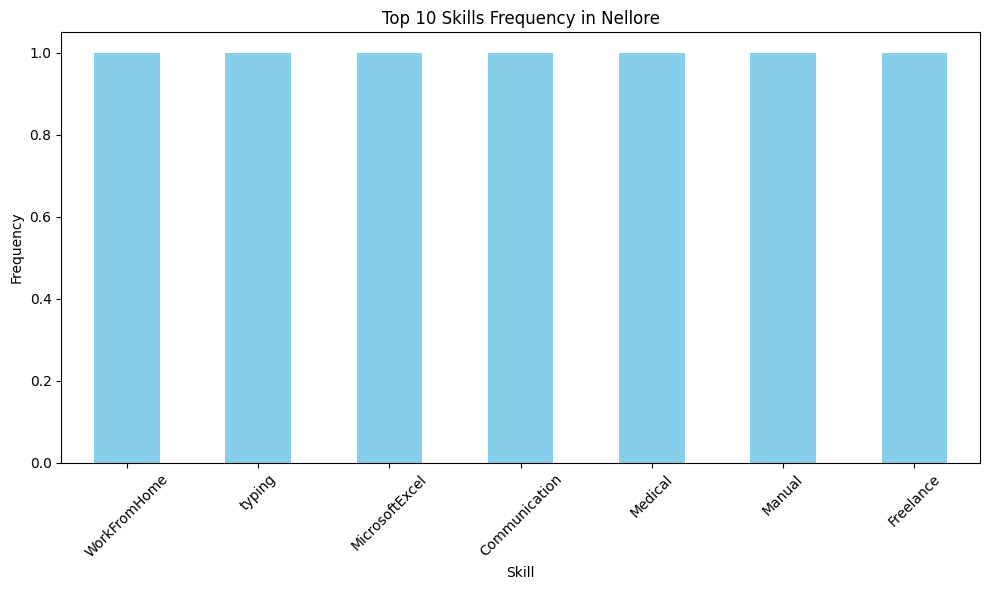

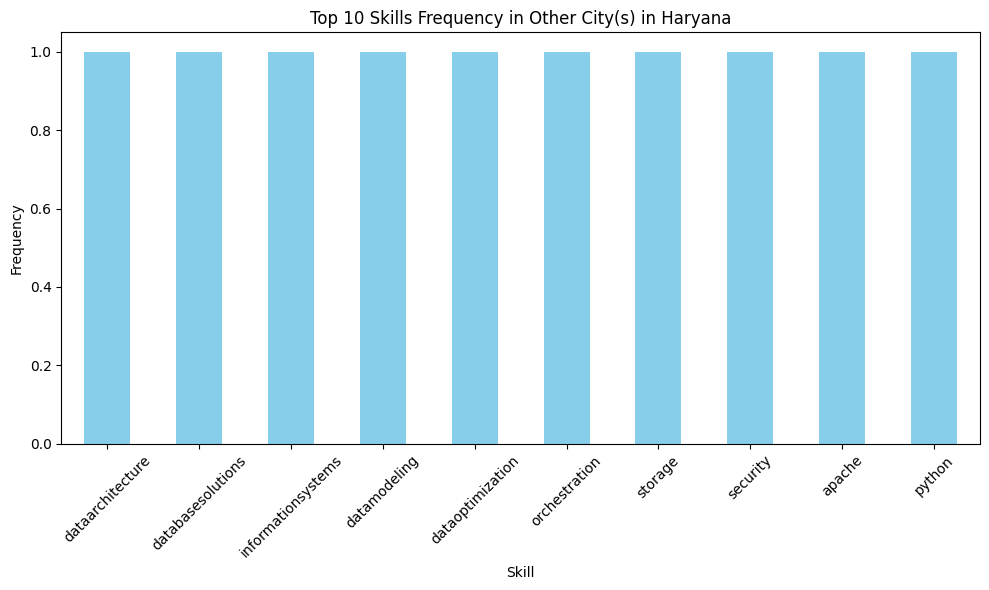

In [109]:
skills_by_location = {}

# Iterate over each row in the DataFrame
for index, row in final_df.iterrows():
    locations = row['Location']
    skills = row['Skills']
    # Update the dictionary with skills for each location
    for location in locations:
        if location not in skills_by_location:
            skills_by_location[location] = []
        skills_by_location[location].extend(skills)

# Analyze the frequency of skills in each location and show only the top 10 skills
for location, skills in skills_by_location.items():
    skill_counts = pd.Series(skills).value_counts().head(10)  # Select top 10 skills

    # Plot bar chart for each location
    plt.figure(figsize=(10, 6))
    skill_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Skills Frequency in {location}')
    plt.xlabel('Skill')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()